In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=2987cb5e77b3f40a006a25da7c47050255d2e285b9cf92630732aae2625c0ebf
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from textblob import TextBlob
from collections import Counter
import re
import nltk
from nltk.corpus import words
from collections import Counter
import time
from langdetect import detect_langs, LangDetectException

In [ ]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
from tqdm import tqdm
import logging

In [ ]:
df_news_final_project = pd.read_parquet('https://storage.googleapis.com/msca-bdp-data-open/news_final_project/news_final_project.parquet', engine='pyarrow')
df_news_final_project.shape

(200760, 5)

In [ ]:
df_news_final_project.dtypes

,0
url,object
date,object
language,object
title,object
text,object


In [ ]:
pd.options.display.max_colwidth = 1000

In [ ]:
display(df_news_final_project.head())

,url,date,language,title,text
0,http://businessnewsthisweek.com/business/infogain-ai-business-solutions-now-available-in-the-microsoft-azure-marketplace/,2023-05-20,en,Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week,"\n\nInfogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week\n\n\r\n\t\t\tBusiness News \n\n \n\n\r\n \t[ May 20, 2023 ] \n\r\n\t\t\t\t\t\t\tCourtyard by Marriott Mahabaleshwar Announces Three New Leadership Appointmen\t\t\t\t\t\t\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tBusiness\t\t\t\t\t\t\t\n\n \n\n\r\n \t[ May 20, 2023 ] \n\r\n\t\t\t\t\t\t\tDibyendu B..."
1,http://www.huewire.com/how-you-should-validate-machine-learning-models-by-patryk-miziula-phd-jul-2023/,2023-07-21,en,"How You Should Validate Machine Learning Models | by Patryk Miziuła, PhD | Jul, 2023 | | #1 NEWS SOURCE FOR PEOPLE OF COLOR ON EARTH !!!!!","\n\nHow You Should Validate Machine Learning Models | by Patryk Miziuła, PhD | Jul, 2023 | | #1 NEWS SOURCE FOR PEOPLE OF COLOR ON EARTH !!!!!\nclose\nHome\nBUSINESS\n\nAFRICAN AMERICAN (B)\nASIAN (B)\nHISPANIC (B)\nINDIAN (B)\nMIDDLE EASTERN (B)\nNATIVE AMERICAN (B)\n\n\nENTERTAINMENT\n\nAFRICAN AMERICAN (E)\nASIAN (E)\nHISPANIC (E)\nINDIAN (E)\nMIDDLE EASTERN (E)\nNATIVE AMERICAN (E)\n\n\nHEALTH\n\nAFRICAN AMERICAN (H)\nASIAN (H)\nHISPANIC (H\nINDIAN (H)\nMIDDLE EASTERN (H)\nNATIVE AMERICA..."
2,http://www.huewire.com/vise-intelligence-is-a-new-ai-to-assist-not-replace-financial-advisors/,2023-09-29,en,Vise Intelligence is a new AI to assist — not replace — financial advisors | | #1 NEWS SOURCE FOR PEOPLE OF COLOR ON EARTH !!!!!,\n\nVise Intelligence is a new AI to assist — not replace — financial advisors | | #1 NEWS SOURCE FOR PEOPLE OF COLOR ON EARTH !!!!!\n \n\nclose\nHome\nBUSINESS\n\nAFRICAN AMERICAN (B)\nASIAN (B)\nHISPANIC (B)\nINDIAN (B)\nMIDDLE EASTERN (B)\nNATIVE AMERICAN (B)\n\n\nENTERTAINMENT\n\nAFRICAN AMERICAN (E)\nASIAN (E)\nHISPANIC (E)\nINDIAN (E)\nMIDDLE EASTERN (E)\nNATIVE AMERICAN (E)\n\n\nHEALTH\n\nAFRICAN AMERICAN (H)\nASIAN (H)\nHISPANIC (H\nINDIAN (H)\nMIDDLE EASTERN (H)\nNATIVE AMERICAN (H)...
3,https://abcnews.go.com/Technology/google-makes-adjustments-ai-overviews-after-rocky-rollout/story?id=110710227,2024-06-03,en,Google makes adjustments to AI Overviews after a rocky rollout - ABC News,"\n\nGoogle makes adjustments to AI Overviews after a rocky rollout - ABC News\n\nABC NewsVideoLiveShowsElections538ShopInterest Successfully AddedWe'll notify you here with news aboutTurn on desktop notifications for breaking stories about interest? OffOnLOG INStream onGoogle makes adjustments to AI Overviews after a rocky rolloutThe new search feature has delivered 'odd and erroneous' responses, Google said.ByMichael DobuskiJune 3, 2024, 12:23 PM0:55A Google logo is displayed on a smartphon..."
4,https://betanews.com/2023/06/08/wordpress-ai-assistant-can-write-blog-posts-for-you/,2023-06-08,en,WordPress' AI Assistant can write blog posts for you,"\n\n\n WordPress' AI Assistant can write blog posts for you\nTech News\nDownloads\nSoftware Store\n\nSearch for:\nBetaNews\nHot Topics:\nWindows 10Windows 11MicrosoftAppleLinuxCloudChatGPTAISecurity \n\nFollow Us:\nTwitter\nFacebook\nLinked-in\nRSS\nWordPress' AI Assistant can write blog posts for you\n\n \n\n\nBy Martin Brinkmann\nPublished 2 hours ago\nNo Comments\n\nTweet\nCanonical, parent company of the content management platform WordPress, announced the release of a new Jetpack tool...."


## Exploratory Data Analysis (EDA)

In [ ]:
print("\nMissing Values\n", df_news_final_project.isnull().sum())


Missing Values
 url         0
date        0
language    0
title       0
text        0
dtype: int64


In [ ]:
# Get the basic statistics of the dataset
df_news_final_project.describe(include='all')

,url,date,language,title,text
count,200760,200760,200760,200760,200760
unique,200760,1296,1,159171,200232
top,https://www.zacks.com/stock/news/2300246/alibabas-baba-generative-ai-efforts-to-boost-aidc-segment,2024-03-01,en,Virtus Artificial Intelligence &amp; Technology Opportunities Fund Discloses Sources of Distribution - Section 19(a) Notice,Accelerate the Development of AI Applications | Scale AI
freq,1,1905,200760,86,9


The number of unique text (200232) is greater than the number of unique titles (159171), indicating either some of the text share the same title (meaning an article is split into multiple parts) or some text don't have titles. Since we checked earlier that there's no missing values, all text must have some titles so the first proposition is more likely.

In [ ]:
df = df_news_final_project

#### EDA on the URL column

In [ ]:
# Check for duplicates
print("Number of unique URLs:", df['url'].nunique())
print("Duplicate URLs:", df['url'].duplicated().sum())

# Extract domains
df['domain'] = df['url'].apply(lambda x: urlparse(x).netloc if pd.notnull(x) else None)
print("\nTop 5 domains:\n", df['domain'].value_counts().head())

# URL length
df['url_length'] = df['url'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
print("\nURL Length Stats:\n", df['url_length'].describe())

# Basic URL validation
invalid_urls = df[~df['url'].str.match(r'^https?://', na=False)]
print("\nInvalid URLs (sample):\n", invalid_urls['url'].head())

Number of unique URLs: 200760
Duplicate URLs: 0

Top 5 domains:
 domain
www.rawpixel.com        8831
citylife.capetown       4040
menafn.com              3846
www.einpresswire.com    3637
www.prnewswire.com      2705
Name: count, dtype: int64

URL Length Stats:
 count    200760.000000
mean        114.070846
std          37.703817
min          17.000000
25%          89.000000
50%         111.000000
75%         136.000000
max         651.000000
Name: url_length, dtype: float64

Invalid URLs (sample):
 Series([], Name: url, dtype: object)


**Key Insights** <br>
There's no duplicate or malformed URLs.

rawpixel.com and citylife.capetow seem to dominate the dataset.

Most of the URL lengths concentrate around 100 characters, but there are a few outliers that are greater than 200 characters.

#### EDA on the DATE column

In [ ]:
# Convert to datetime (adjust format as needed)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check missing or invalid dates
print("Missing Dates:", df['date'].isnull().sum())

# Date range
print("\nDate Range:", df['date'].min(), "to", df['date'].max())

# Distribution by year
df['year'] = df['date'].dt.year
print("\nArticles by Year:\n", df['year'].value_counts().sort_index())

Missing Dates: 0

Date Range: 2022-01-01 00:00:00 to 2025-07-22 00:00:00

Articles by Year:
 year
2022    21974
2023    86852
2024    60353
2025    31581
Name: count, dtype: int64


In [ ]:
# Distribution by months
df['month'] = df['date'].dt.to_period('M')
print("\nArticles by Month:\n", df['month'].value_counts().sort_index())

# Weekday analysis
df['weekday'] = df['date'].dt.day_name()
print("\nArticles by Weekday:\n", df['weekday'].value_counts())


Articles by Month:
 month
2022-01     1416
2022-02     1400
2022-03     1264
2022-04     1065
2022-05     1902
2022-06     2446
2022-07     2267
2022-08     2088
2022-09     2213
2022-10     1907
2022-11     2018
2022-12     1988
2023-01     3761
2023-02     5563
2023-03     6122
2023-04     6160
2023-05     8601
2023-06     7903
2023-07     6948
2023-08     8441
2023-09     8368
2023-10     6585
2023-11     9864
2023-12     8536
2024-01     5085
2024-02    10025
2024-03     8631
2024-04     4489
2024-05     5597
2024-06     4389
2024-07     3734
2024-08     3447
2024-09     4076
2024-10     4021
2024-11     3406
2024-12     3453
2025-01     5433
2025-02     4303
2025-03     4465
2025-04     4155
2025-05     4607
2025-06     4957
2025-07     3661
Freq: M, Name: count, dtype: int64

Articles by Weekday:
 weekday
Tuesday      39241
Wednesday    39229
Thursday     37469
Friday       29655
Monday       29021
Saturday     14456
Sunday       11689
Name: count, dtype: int64


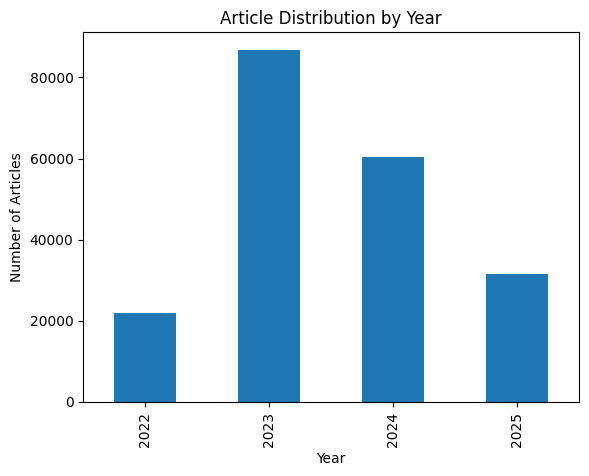

In [ ]:
# Plot distribution by year
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Article Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

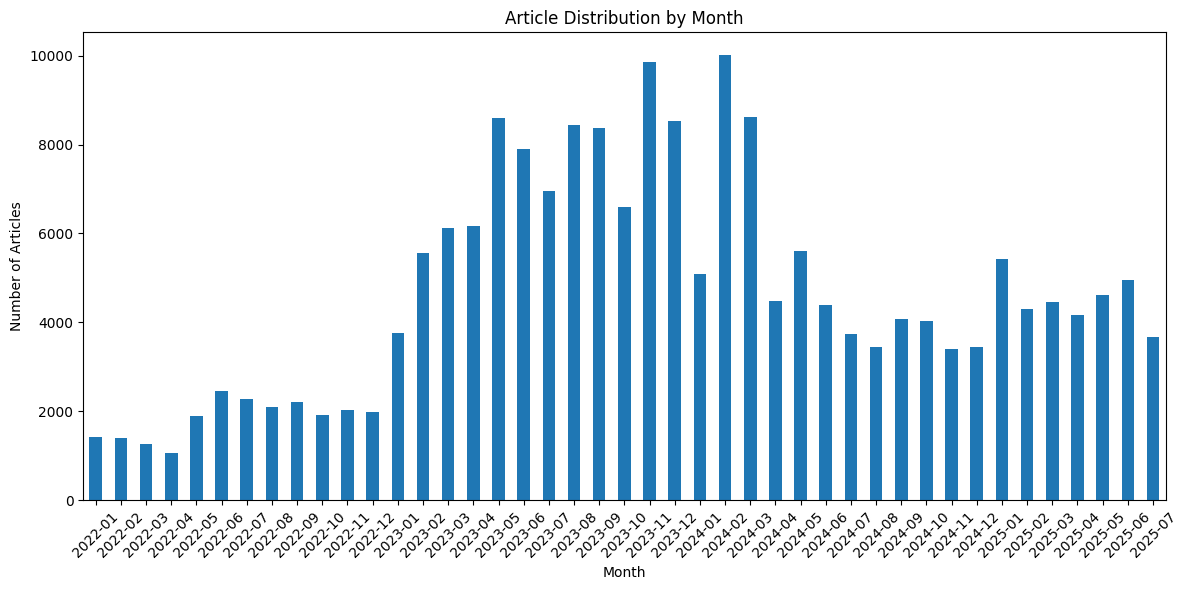

In [ ]:
# Plot distribution by month
df['month'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Article Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

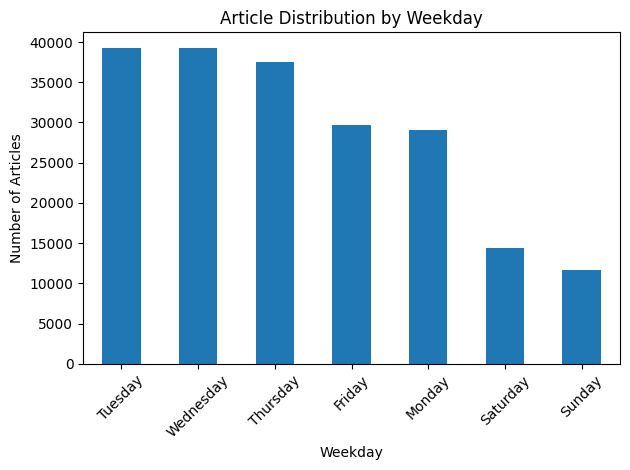

In [ ]:
# Plot distribution by weekday
df['weekday'].value_counts().plot(kind='bar')
plt.title('Article Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Insights** <br>

The time span of the dataset ranges from 2022 to this month (July, 2025).

There's a spike of the article in years of 2023 and 2024, especially in Oct 2023 and Jan 2024.

More publications come out in Tuesday, Wednesday, and Thursday than any other day of the week.

#### EDA on the Language Column

In [ ]:
# Language distribution
print("Language Distribution:\n", df['language'].value_counts())

# Check for missing languages
print("\nMissing Languages:", df['language'].isnull().sum())


Language Distribution:
 language
en    200760
Name: count, dtype: int64

Missing Languages: 0


#### EDA on the Title Column

In [ ]:
# Missing titles
print("Missing Titles:", df['title'].isnull().sum())

# Title length (in words)
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
print("\nTitle Word Count Stats:\n", df['title_word_count'].describe())

# Duplicate titles
print("\nDuplicate Titles:", df['title'].duplicated().sum())

Missing Titles: 0

Title Word Count Stats:
 count    200760.000000
mean         13.778073
std           6.033555
min           1.000000
25%          11.000000
50%          13.000000
75%          16.000000
max        1325.000000
Name: title_word_count, dtype: float64

Duplicate Titles: 41589


In [ ]:
# Common words (basic cleaning)
stop_words = set(['the', 'a', 'an', 'in', 'to', 'of', 'and'])  # Add more as needed
def clean_text(text):
    if pd.notnull(text):
        text = re.sub(r'[^\w\s]', '', text.lower())
        return [word for word in text.split() if word not in stop_words]
    return []

all_words = df['title'].apply(clean_text).explode()
print("\nTop 10 Common Words in Titles:\n", Counter(all_words).most_common(10))


Top 10 Common Words in Titles:
 [('ai', 164890), ('for', 35024), ('with', 25632), ('on', 18280), ('new', 18061), ('intelligence', 17780), ('news', 17333), ('artificial', 17015), ('chatgpt', 15072), ('is', 14038)]


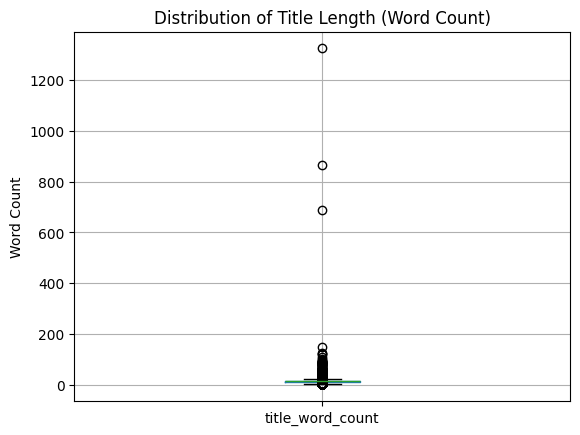

In [ ]:
# Make a box plot for the title word count
df.boxplot(column='title_word_count')
plt.title('Distribution of Title Length (Word Count)')
plt.ylabel('Word Count')
plt.show()

**Key Insight** <br>
41589 of the titles are duplicated, indicating content being split into multiple text sections or repeated content.

Majority of the titles are less than 17 words long. There are outliers though with impossibly long title.




#### EDA on the Text Column

In [ ]:
# Missing text
print("Missing Text:", df['text'].isnull().sum())

# Duplicate text
print("\nDuplicate Text:", df['text'].duplicated().sum())

# Text length (in words)
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
print("\nText Word Count Stats:\n", df['text_word_count'].describe())

Missing Text: 0

Duplicate Text: 528

Text Word Count Stats:
 count    200760.000000
mean       1198.354129
std         960.842484
min           4.000000
25%         689.000000
50%        1003.000000
75%        1506.000000
max       35028.000000
Name: text_word_count, dtype: float64


In [ ]:
# Check for HTML or boilerplate (simplified)
html_pattern = r'<[^>]+>'
df['has_html'] = df['text'].str.contains(html_pattern, na=False)
print("\nArticles with HTML Tags:", df['has_html'].sum())


Articles with HTML Tags: 2546


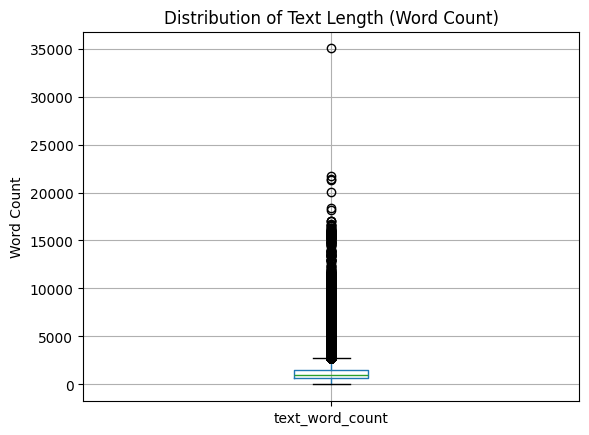

In [ ]:
df.boxplot(column='text_word_count')
plt.title('Distribution of Text Length (Word Count)')
plt.ylabel('Word Count')
plt.show()

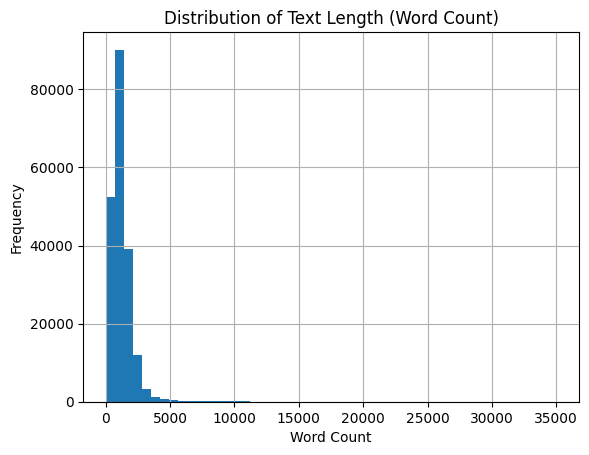

In [ ]:
# Plot distribution of text length
df['text_word_count'].hist(bins=50)
plt.title('Distribution of Text Length (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

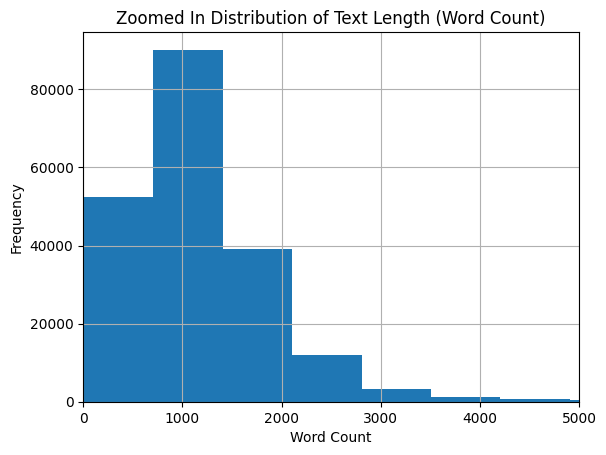

In [ ]:
# Plot distribution of text length
df['text_word_count'].hist(bins=50)
plt.title('Zoomed In Distribution of Text Length (Word Count)')
plt.xlim(0,5000)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

**Key Insights** <br>
Typical length of text is about 1000 words-long, with a few outliers having more than 2000 words in an article. There are also some very short text that we should examine.

## Data Cleaning

In [ ]:
df = df_news_final_project

In [ ]:
df.shape

(200760, 6)

In [ ]:
df.tail()

,url,date,language,title,text,text_word_count
200755,https://www.wuwf.org/2024-06-03/all-eyes-on-rafah-is-the-internets-most-viral-ai-image-two-artists-are-claiming-credit,2024-06-03,en,‘All eyes on Rafah’ is the Internet's most viral AI image. Two artists are claiming credit. | WUWF,\n‘All eyes on Rafah’ is the Internet's most viral AI image. Two artists are claiming credit. | WUWF\nSearch Query\nShow Search\nAbout \nAbout Us\n\nContact Us\n\nHow Can I Promote My Cause?\n\nOur Code of Editorial Integrity\n\nOur Mission and Vision\n\nWUWF Celebrates 40 Years of Service\n\nWUWF People\n\nYour Right to Know\n\nGet Our Apps\n\nFacebook\n\nTwitter\n\nInstagram\n\nYoutube\n\nUWF Board of Trustees\nAbout Us\n\nContact Us\n\nHow Can I Promote My Cause?\n\nOur Code of Editorial ...,2564
200756,https://www.wvtf.org/2024-09-24/human-reviewers-cant-keep-up-with-police-bodycam-videos-ai-now-gets-the-job,2024-09-24,en,Human reviewers can't keep up with police bodycam videos. AI now gets the job | WVTF,\n\nHuman reviewers can't keep up with police bodycam videos. AI now gets the job | WVTF\nSearch Query\nShow Search\nSchedule & Frequencies \nRADIO IQ\n\nWVTF Music\n\nFrequencies & Coverage Maps\n\nListen Live\n\nRadio Reading Service\nRADIO IQ\n\nWVTF Music\n\nFrequencies & Coverage Maps\n\nListen Live\n\nRadio Reading Service\nNews\nElection 101: Virginia voting basics\n\nMeet Virginia\n\nCommonWX Weather & Climate Newsletter\n\nTribal Truths Podcast\n\nMemory Wars Podcast\n\nBranded: The...,1815
200757,https://www.wyso.org/npr-news/2025-07-09/impostor-uses-ai-to-impersonate-rubio-and-contact-foreign-and-u-s-officials,2025-07-09,en,Impostor uses AI to impersonate Rubio and contact foreign and U.S. officials | WYSO,\n\nImpostor uses AI to impersonate Rubio and contact foreign and U.S. officials | WYSO\n\nSearch Query\nShow Search\nListen\nOn Air Schedule\n\nProgram Directory\n\nWays to Listen to WYSO\n\nPodcasts\n\nWYSO Station Updates\nOn Air Schedule\n\nProgram Directory\n\nWays to Listen to WYSO\n\nPodcasts\n\nWYSO Station Updates\nNews\nLatest from WYSO\n\nArts & Culture\n\nBusiness & Economy\n\nEducation\n\nEnvironment\n\nFood & Agriculture\n\nGovernment & Politics\n\nHealth\n\nIndigenous Affairs\...,1723
200758,https://www.yourtango.com/news/why-people-trust-chatgpt-so-much,2025-06-27,en,Why People Trust ChatGPT | YourTango,Why People Trust ChatGPT | YourTango ☰ Revolutionizing Your Relationships Main navigation Love Quotes Zodiac Horoscope Entertainment & News Family Self Health & Wellness Heartbreak Expert Advice Why The Heck Do People Trust ChatGPT So Much? Login Register X Hamburger menu Love Zodiac Horoscope Entertainment & News Quotes Astrology Career & Money Self Sex Health & Wellness Love Quotes Divorce Family Breakups Heartbreak Expert Advice Marriage Masterclass Parenting Masterclass Search Ar...,2411
200759,https://www.zacks.com/stock/news/2300246/alibabas-baba-generative-ai-efforts-to-boost-aidc-segment,2024-07-11,en,"Alibaba's (BABA) Generative AI Efforts to Boost AIDC Segment - July 11, 2024 - Zacks.com","\nAlibaba's (BABA) Generative AI Efforts to Boost AIDC Segment - July 11, 2024 - Zacks.com\nSkip to main content\n\nWe use cookies to understand how you use our site and to improve your experience. This includes personalizing content and advertising. To learn more, click here. By continuing to use our site, you accept our use of cookies, revised Privacy Policy and Terms of Service.\nI acceptX\n \n\nMenu\nToggle header navigation\nHome\n\n\nStocks\nStocks\n\n\nStocks\nZacks #1 Rank\nZacks Ran...",1848


#### **Simple Row Cleaning**

In [ ]:
# Remove rows with text length less than 100
initial_rows_1 = df.shape[0]
df_cleaned = df[df['text_word_count'] >= 100].copy()
removed_rows_1 = initial_rows_1 - df_cleaned.shape[0]

print(f"Removed {removed_rows_1} rows with text length less than 100.")
print("New DataFrame shape:", df_cleaned.shape)

# Drop duplicate texts, keeping the first occurrence
initial_rows = df_cleaned.shape[0]
df_cleaned = df_cleaned.drop_duplicates(subset=['text'], keep='first')
removed_rows = initial_rows - df_cleaned.shape[0]

print(f"Removed {removed_rows} rows with duplicate text.")
print("New DataFrame shape after removing short and duplicate texts:", df_cleaned.shape)

Removed 7463 rows with text length less than 100.
New DataFrame shape: (193297, 6)
Removed 476 rows with duplicate text.
New DataFrame shape after removing short and duplicate texts: (192821, 6)


**Examine rows with duplicate titles**

In [ ]:
# Display a few samples of rows of df having duplicate titles
duplicate_titles = df_cleaned[df_cleaned['title'].duplicated(keep=False)]
display(duplicate_titles['title'].head())

,title
5,"Microsoft ChatGPT: Microsoft integrates AI behind ChatGPT to more developer tools, ET BrandEquity"
8,Has AI passed the Turing test?
11,Can AI love a human?
21,UK summit aims to tackle thorny issues around cutting-edge AI risks
26,"Microsoft adds AI tools to Office apps like Outlook, Word – KION546"


In [ ]:
display(df_cleaned[df_cleaned['title'] == 'Has AI passed the Turing test?'][['title', 'text']])

,title,text
8,Has AI passed the Turing test?,"Has AI passed the Turing test? \n \n\nRekte al enhavoSat. 9 decembro 2023 Urba VivoMalkaŝado de Novaj Teknologioj kaj la Potenco de AI\n \n\nAInovaĵojspacoteknologiosatelitosciencoUsonakontakton\n\n \nAI\n\nArtefarita inteligento\n\nnovaĵoj\n \nHas AI passed the Turing test?\n ByGabriel Botha\n\nDec 7, 2023\n resumo:\nThe Turing test, proposed by British mathematician and..."
23750,Has AI passed the Turing test?,"Has AI passed the Turing test? \n \n\nPrejsť na obsahSt. 13. decembra 2023 Mestský životOdhalenie nových technológií a sily AI\n \n\nAINovinkyMiestoTechnológiasatelitvedaSpojené štátyKontakt\n\n \nAI\n\nUmelá inteligencia\n\nNovinky\n \nHas AI passed the Turing test?\n ByGabriel Botha\n\nDecembra 7, 2023\n Zhrnutie:\nThe Turing test, proposed by British mathematician and ..."
28114,Has AI passed the Turing test?,"Has AI passed the Turing test? \n \n\nഉള്ളടക്കത്തിലേക്ക് പോകുകചൊവ്വ. 12 ഡിസംബർ 2023 നഗര ജീവിതംപുതിയ സാങ്കേതികവിദ്യകളും AI-യുടെ ശക്തിയും അനാവരണം ചെയ്യുന്നു\n \n\nAIവാര്ത്തഇടംസാങ്കേതികവിദ്യഉപഗ്രഹംശാസ്ത്രംയുഎസ്ബന്ധപ്പെടുക\n\n \nAI\n\nകൃത്രിമ ബുദ്ധി\n\nവാര്ത്ത\n \nHas AI passed the Turing test?\n Byഗബ്രിയേൽ ബോത്ത\n\nഡിസം 7, 2023\n ചുരുക്കം:\nThe Turing test, proposed by Brit..."
46302,Has AI passed the Turing test?,"Has AI passed the Turing test? \n \n\nHijery ny anatinyTalata. 12 Desambra 2023 Fiainan-tanànaFamoahana ny teknolojia vaovao sy ny herin'ny AI\n \n\nAIVaovaoSpaceteknolojiaSatelliteScienceUSLaharana fandraisana na rohy\n\n \nAI\n\nfahaizana artifisialy\n\nVaovao\n \nHas AI passed the Turing test?\n ByGabriel Botha\n\nDec 7, 2023\n famintinana:\nThe Turing test, proposed b..."
86882,Has AI passed the Turing test?,"Has AI passed the Turing test? \n \n\nGean nei de ynhâldza. 9 desimber 2023 StedslibbenNije technologyen en de krêft fan AI ûntbleate\n \n\nAINijsRûmteTechnologySatellytWittenskipUSKontakt\n\n \nAI\n\nkeunstmjittige yntelliginsje\n\nNijs\n \nHas AI passed the Turing test?\n ByGabriel Botha\n\nDec 7, 2023\n Gearfetting:\nThe Turing test, proposed by British mathematician a..."
100332,Has AI passed the Turing test?,"Has AI passed the Turing test? \n \n\nPereiti prie turinioantradienis 12 m. gruodžio 2023 d Miesto gyvenimasNaujų technologijų ir AI galios pristatymas\n \n\nAINaujienoserdvėTechnologijaPalydovinisMokslasJAVKontaktai\n\n \nAI\n\ndirbtinis intelektas\n\nNaujienos\n \nHas AI passed the Turing test?\n ByGabrielius Botha\n\nGruodis 7, 2023\n santrauka:\nThe Turing test, propo..."
124968,Has AI passed the Turing test?,"Has AI passed the Turing test? \n \n\n跳到內容星期六9 年 2023 月 XNUMX 日 城市生活揭開新技術和人工智能的力量\n \n\nAI最新消息宇宙專業技術衛星科學美國聯繫\n\n \nAI\n\n人工智能\n\n最新消息\n \nHas AI passed the Turing test?\n By加布里埃爾博塔\n\n十二月7，2023\n 概要：\nThe Turing test, proposed by British mathematician and computer scientist Alan Turing in 1950, is a benchmark for determining whether a machine can exhibit intelligent behav..."
156125,Has AI passed the Turing test?,"Has AI passed the Turing test? \n \n\nRekọja si akoonuJimọ. Oṣu kejila ọjọ 15, ọdun 2023 Igbesi aye IluṢiṣii Awọn Imọ-ẹrọ Tuntun ati Agbara AI\n \n\nAINewsSpaceImọ-ẹrọSatelliteScienceUSolubasọrọ\n\n \nAI\n\nOye atọwọda\n\nNews\n \nHas AI passed the Turing test?\n ByGabriel Botha\n\nDec 7, 2023\n Lakotan:\nThe Turing test, proposed by British mathematician and computer sci..."
177603,Has AI passed the Turing test?,"Has AI passed the Turing test? \n \n\nPreskoči na sadržajčet. 7. decembra 2023 City LifeOtkrivanje novih tehnologija i moći AI\n \n\nAIVijestiprostortehnologijasatelitnaukaAmeričkiKontakt\n\n \nAI\n\nUmjetna inteligencija\n\nVijesti\n \nHas AI passed the Turing test?\n ByGabriel Botha\n\nDecembar 7, 2023\n Sažetak:\nThe Turing test, proposed by British mathematician and c..."
179044,Has AI passed the Turing test?,"Has AI passed the Turing test? \n \n\nLaktawan sa nilalamanSab. ika-9 ng Disyembre, 2023 Buhay siyudadPaglalahad ng Bagong Teknolohiya at ang Kapangyarihan ng AI\n \n\nAIBalitaPuwangTeknolohiyaSat

In [ ]:
display(df_cleaned[df_cleaned['title'] == 'Can AI love a human?'][['title', 'text']])

,title,text
11,Can AI love a human?,"Can AI love a human? \n \n\nHijery ny anatinyTalata. 12 Desambra 2023 Fiainan-tanànaFamoahana ny teknolojia vaovao sy ny herin'ny AI\n \n\nAIVaovaoSpaceteknolojiaSatelliteScienceUSLaharana fandraisana na rohy\n\n \nAI\n\nfahaizana artifisialy\n\nVaovao\n\nteknolojia\n \nCan AI love a human?\n ByMampho Brescia\n\nDec 7, 2023\n famintinana:\nArtificial Intelligence (AI) has..."
14172,Can AI love a human?,"Can AI love a human? \n \n\nSkip isiMon. 11 Dhésèmber 2023 Urip KuthaNgumumake Teknologi Anyar lan Kekuwatan AI\n \n\nAINewsSpaceTeknologiSatelliteIlmuUSkontak\n\n \nAI\n\nKacerdhasan gawéyan\n\nNews\n\nTeknologi\n \nCan AI love a human?\n ByMampho Brescia\n\nDec 7, 2023\n Summary:\nArtificial Intelligence (AI) has made significant advancements in recent years, leading to..."
22107,Can AI love a human?,"Can AI love a human? \n \n\nSalt la conținutMarți. 12 decembrie 2023 Viata de orasDezvăluirea noilor tehnologii și a puterii AI\n \n\nAINoutăţiSpaţiuTehnologiaSatelitŞtiinţăS.U.A.Contact\n\n \nAI\n\nInteligență artificială\n\nNoutăţi\n\nTehnologia\n \nCan AI love a human?\n ByMampho Brescia\n\nDecembrie 7, 2023\n Rezumat:\nArtificial Intelligence (AI) has made significant..."
44723,Can AI love a human?,"Can AI love a human? \n \n\nSkip to contentFri. Dec 8th, 2023 CityLifeUnveiling New Technologies and the Power of AI\n \n\nAINewsSpaceTechnologySatelliteScienceU.S.Contact\n\n \nAI\n\nArtificial intelligence\n\nNews\n\nTechnology\n \nCan AI love a human?\n ByMampho Brescia\n\nDec 7, 2023\n Summary:\nArtificial Intelligence (AI) has made significant advancements in recent ..."
50025,Can AI love a human?,"Can AI love a human? \n \n\nмэдээлэл рүү очихМягмар 12 оны арванхоёрдугаар сарын 2023 Хотын амьдралШинэ технологи, хиймэл оюун ухааны хүчийг нээлээ\n \n\nAIМэдээорон зайТехнологийнхиймэл дагуулынШинжлэх ухаанАНУ-ынХолбоо барих\n\n \nAI\n\nХиймэл оюун ухаан\n\nМэдээ\n\nТехнологийн\n \nCan AI love a human?\n ByМамфо Брешиа\n\nDec 7, 2023\n Дүгнэлт:\nArtificial Intelligence ..."
57219,Can AI love a human?,"Can AI love a human? \n \n\nFaapasi i anotusiAso Lulu. Tesema 13, 2023 Soifuaga A'aiFa'ailoaina o Tekinolosi Fou ma le Malosi o AI\n \n\nAItalaavanoaTekonolosisoasaienisiUSfetaui\n\n \nAI\n\natamai faato\n\ntala\n\nTekonolosi\n \nCan AI love a human?\n ByMampho Brescia\n\nTesema 7, 2023\n aotelega:\nArtificial Intelligence (AI) has made significant advancements in recent ..."
85679,Can AI love a human?,"Can AI love a human? \n \n\nZvashandiswa kugutsikanaWed. Zvita 13, 2023 City LifeKuvheneka Tekinoroji Itsva uye Simba reAI\n \n\nAInhaunzvimboTechnologysetiraitisainziUSudza mashoko\n\n \nAI\n\nchakagadzirwa njere\n\nnhau\n\nTechnology\n \nCan AI love a human?\n ByMampho Brescia\n\nDec 7, 2023\n Summary:\nArtificial Intelligence (AI) has made significant advancements in r..."
86885,Can AI love a human?,"Can AI love a human? \n \n\nसामग्री छोड्नशुक्र डिसेम्बर ८, २०२३ शहरी जीवननयाँ प्रविधिहरू र एआईको शक्ति अनावरण गर्दै\n \n\nAIसमाचारस्पेसप्रविधिउपग्रहविज्ञानअमेरिकीसम्पर्क\n\n \nAI\n\nकृत्रिम बुद्धि\n\nसमाचार\n\nप्रविधि\n \nCan AI love a human?\n Byमाम्फो ब्रेसिया\n\nदिसम्बर 7, 2023\n सारांश:\nArtificial Intelligence (AI) has made significant advancements in recent years, l..."
92230,Can AI love a human?,"Can AI love a human? \n \n\nمواد پر جائیںجمعرات۔ 14 دسمبر 2023 سٹی لائفنئی ٹیکنالوجیز اور AI کی طاقت کی نقاب کشائی\n \n\nAIخبریںخلاٹیکنالوجیسیٹلائٹسائنسامریکیرابطہ کریں\n\n \nAI\n\nمصنوعی ذہانت\n\nخبریں\n\nٹیکنالوجی\n \nCan AI love a human?\n Byمیمفو بریشیا۔\n\nدسمبر 7، 2023\n خلاصہ:\nArtificial Intelligence (AI) has made significant advancements in recent years, leading ..."
98127,Can AI love a human?,"Can AI love a human? \n \n\nໃຫ້ຂ້າມໄປຫາເນື້ອໃນຈັນ. ວັນທີ 11 ທັນວາ 2023 ຊີວິດເມືອງເປີດຕົວເທັກໂນໂລຍີໃໝ່ ແລະພະລັງຂອງ AI\n \n\nAIຂ່າວSpaceເຕັກໂນໂລຊີດາວທຽມວິທະຍາສາດສະ​ຫະ​ລັດຕິດຕໍ່\n\n \nAI\n\nປັນຍາປະດິດ\n\nຂ່າວ\n\nເຕັກໂນໂລຊີ\n \nCan AI love a human?\n ByMampho Brescia\n\nDec 7, 2023\n ສະຫຼຸບສັງລວມ:\nArti

It seems that many duplicate articles are from the same content translated into various languages. We should only retain the English article and remove the other ones.

#### **Remove Non-English Title Rows**

In [ ]:
# Create a sample data from the first 20 rows of cleaned_df
sample_data = df_cleaned.iloc[:20].copy()
sample_data['title']

,title
0,Infogain AI Business Solutions Now Available i...
1,How You Should Validate Machine Learning Model...
2,Vise Intelligence is a new AI to assist — not ...
3,Google makes adjustments to AI Overviews after...
4,WordPress' AI Assistant can write blog posts...
5,Microsoft ChatGPT: Microsoft integrates AI beh...
6,Chinese tech companies face increased EU compl...
7,"Artificial Intelligence: Top AI CEOs, experts ..."
8,Has AI passed the Turing test?
9,"Ua lawa anei ka $60,000 e noho ai ma Vancouver?"


In [ ]:
# Download NLTK words corpus (English dictionary)
nltk.download('words', quiet=True)
english_words = set(word.lower() for word in words.words())  # Case-insensitive lookup

In [ ]:
# Add custom tech-related terms and proper nouns
custom_english_terms = {
    # Core AI & ML
    'ai', 'artificial', 'intelligence', 'artificial intelligence', 'machine', 'learning',
    'machine learning', 'ml', 'deep learning', 'neural network', 'generative ai'
    'llm', 'large language model', 'generative', 'chatgpt', 'gpt', 'gpt-3', 'gpt-4',
    'openai', 'anthropic', 'claude', 'bard', 'gemini', 'grok', 'deepseek', 'mistral',
    'agi', 'artificial general intelligence', 'narrow ai', 'transformer', 'attention mechanism',
    'diffusion model', 'stable diffusion', 'dall-e', 'midjourney', 'computer vision', 'nlp',
    'natural language processing', 'reinforcement learning', 'rlhf', 'supervised learning',
    'unsupervised learning', 'semi-supervised learning', 'federated learning',  'explainable ai',
    'explainable machine learning', 'explainable artificial intelligence', 'Llama',

    # Big Tech & AI Companies
    'chatgpt', 'microsoft', 'azure', 'copilot', 'github', 'linkedin', 'meta', 'facebook', 'google',
    'alphabet', 'deepmind', 'amazon', 'aws', 'anthropic', 'openai', 'tesla', 'xai',
    'nvidia', 'amd', 'intel', 'apple', 'siri', 'samsung', 'ibm', 'watson', 'oracle',
    'huawei', 'tencent', 'alibaba', 'baidu', 'bytedance', 'tiktok', 'anthropic', 'microsoft',
     'intel', 'hp', 'samsung', 'thoughtsphere', 'spotify', 'soni', 'openai', 'tesla', 'xai',
    'nvidia', 'amd', 'intel', 'apple', 'siri', 'samsung',', 'tiktok', 'tempus', 'emtelligent',
    'marketstar', 'strava', 'genai', 'vlc', 'mcra', 'ibm', 'watson', 'oracle',
    'huawei', 'tencent', 'alibaba', 'baidu', 'bytedance

    # Programming & Development
    'python', 'javascript', 'typescript', 'java', 'c++', 'c#', 'rust', 'go', 'golang',
    'kotlin', 'swift', 'ruby', 'php', 'html', 'css', 'react', 'angular', 'vue',
    'nodejs', 'docker', 'kubernetes', 'terraform', 'ansible', 'devops', 'agile',
    'scrum', 'ci/cd', 'git', 'github', 'gitlab', 'vscode', 'jupyter', 'notebook',
    'huggingface', 'transformers', 'pytorch', 'tensorflow', 'keras', 'flask',

    # Cloud & Infrastructure
    'cloud', 'cloud computing', 'serverless', 'microservices', 'saas', 'paas', 'iaas',
    'azure', 'aws', 'gcp', 'google cloud', 'lambda', 's3', 'ec2', 'kubernetes', 'k8s',
    'docker', 'containers', 'edge computing', 'quantum computing',

    # Data & Analytics
    'data science', 'big data', 'data mining', 'sql', 'nosql', 'mongodb', 'postgresql',
    'spark', 'hadoop', 'pandas', 'numpy', 'tensorflow', 'pytorch', 'keras', 'scikit-learn',
    'opencv', 'apache', 'kafka', 'airflow', 'tableau', 'powerbi', 'salesforce', 'accenture',
    'data scientist', 'data engineer', 'data', 'science',

    # Cybersecurity & Blockchain
    'cybersecurity', 'encryption', 'blockchain', 'bitcoin', 'ethereum', 'crypto',
    'nft', 'web3', 'metaverse', 'defi', 'smart contract', 'solidity', 'zero trust',
    'vpn', 'phishing', 'ransomware', 'ddos',

    # Emerging Tech & Trends
    'iot', 'internet of things', 'ar', 'augmented reality', 'vr', 'virtual reality',
    'mixed reality', 'autonomous vehicles', 'self-driving', 'tesla autopilot',
    'robotics', 'quantum computing', '5g', '6g', 'nanotechnology', 'biotech',
    'crispr', 'synthetic biology', 'fintech', 'insurtech', 'agtech',  'app',
    'adobe', 'iphone', 'ipad', 'macbook', 'photoshop', 'smartphone', 'microcloud',

    # Miscellaneous
    'algorithm', 'api', 'backend', 'frontend', 'fullstack', 'ux', 'ui', 'chatbot',
    'low-code', 'nocode', 'raspberry pi', 'arduino', 'turing test', 'singularity',
    'moonshot', 'disruptive', 'unicorn', 'startup', 'scaleup', 'viral', 'growth hacking',
    'blueshift', 'growth hacking','subtitles', 'vetting',
    'salary', 'supercomputer', 'tpus', 'gpus', 'mistral', '4k', 'thinq', 'nasdaq',
    'macquarie', 'copilot', 'galaxy', 'book4', 'humanoid', 'eclipse', 'solar',
    'bollywood', 'actress', 'actresses', 'cryptocurrency', 'forex', 'banking',
    'philanthropic', 'community', 'concordance', 'reporting', 'rsna', 'imaging',
    'alphafold', 'protein', 'financial', 'services', 'smashes', 'records', 'fastest',
    'open-top', 'stupiddope', 'geeky', 'gadgets', 'insidehook', 'levels', 'benzinga',
    'mystateline', 'wkrb', 'cryptopolitan', 'exbulletin', 'telecom', 'spintronics',
    'silicon', 'photonics', 'convergence', 'ecology', 'ecologist', 'birdsong', 'identification'

    # Added terms
    'garage', 'posts', 'published', 'archived', 'explained', 'r1', 'images', 'ifa', 'ibc',
    'b2b', 'kanggo', 'humana', 'liquid-cooled', 'healthcare', 'deepfake', 'deepfakes', 'ip-based',
    'taskade'
}
english_words.update(custom_english_terms)

In [ ]:
# Compile regex patterns
word_pattern = re.compile(r'\b[\w\'-]+\b')
neutral_pattern = re.compile(r'^\d+$|^\d+:\d+$|^\d+,\d+$|^[A-Z]+:\w+$|^\w+\d+$')

def is_english_title(title):
    """Check if at least 30% of non-neutral words are English or if title is detected as English."""
    if pd.isna(title) or not title.strip():
        return False
    # Tokenize title
    words = word_pattern.findall(title)
    if not words:
        return False
    # Separate content words and neutral tokens (numbers, time, model IDs, stock tickers)
    content_words = [word for word in words if not neutral_pattern.match(word)]
    if not content_words:
        return False
    # Count English content words
    english_count = sum(1 for word in content_words if word.lower() in english_words)
    proportion_english = english_count / len(content_words)

    # Language detection as fallback
    try:
        lang_probs = detect_langs(title)
        is_english = any(lang.lang == 'en' and lang.prob > 0.8 for lang in lang_probs)
    except LangDetectException:
        is_english = False

    # Debug for titles failing both checks
    if proportion_english < 0.3 and not is_english:
        print(f"\nDebugging Title: {title}")
        """print("Words:", words)
        print("Content Words:", content_words)
        for word in content_words:
            print(f"  {word}: {'English' if word.lower() in english_words else 'Non-English'}") """
        print(f"English Proportion: {english_count}/{len(content_words)} = {proportion_english:.2%}")
        #print(f"Language Detection: {lang_probs}")

    return proportion_english >= 0.3 or is_english

In [ ]:
def filter_english_titles(df):
    """Remove rows where less than 30% of non-neutral title words are English and not detected as English."""
    start_time = time.time()

    # Ensure 'title' column exists
    if 'title' not in df.columns:
        raise ValueError("DataFrame must contain a 'title' column")

    # Apply English title check
    mask = df['title'].apply(is_english_title)
    df_filtered = df[mask].copy()

    print("\nRows kept:", len(df_filtered))
    print("Rows removed:", len(df) - len(df_filtered))
    print("Filtering Time:", time.time() - start_time, "seconds")

    return df_filtered

In [ ]:
# Test the filter_english_titles function on the sample data
sample_results = filter_english_titles(sample_data)
sample_results.shape[0]


Debugging Title: ការបង្ហាញរលកបោកបញ្ឆោតអាថ៌កំបាំង៖ ការយល់ដឹងពី AI និងទិន្នន័យមហាសមុទ្រ
English Proportion: 1/24 = 4.17%

Rows kept: 19
Rows removed: 1
Filtering Time: 0.43210411071777344 seconds


19

In [ ]:
# Apply filter english titles to the full dataset
df_cleaned = filter_english_titles(df_cleaned)


Debugging Title: ការបង្ហាញរលកបោកបញ្ឆោតអាថ៌កំបាំង៖ ការយល់ដឹងពី AI និងទិន្នន័យមហាសមុទ្រ
English Proportion: 1/24 = 4.17%

Debugging Title: Je AI hrozbou pre ľudstvo?
English Proportion: 1/5 = 20.00%

Debugging Title: Cách mạng hóa các thử nghiệm lâm sàng: Tác động của AI đến hiệu quả và kết quả của bệnh nhân
English Proportion: 1/21 = 4.76%

Debugging Title: Nový nástroj AI generuje syntetické vtáčie piesne na zlepšenie ekologického monitorovania
English Proportion: 2/11 = 18.18%

Debugging Title: Na-ewepụta ikike nke igwe ojii AI maka Smarter, Ọrụ ịntanetị Ọsọsọ
English Proportion: 1/11 = 9.09%

Debugging Title: Intel သည် Game-Changing AI Chip, Gaudi3 ကို ထုတ်ဖော်ပြသခဲ့သည်။
English Proportion: 3/12 = 25.00%

Debugging Title: Revolutionizing UK Manufacturing: Basa reArtificial Intelligence
English Proportion: 1/6 = 16.67%

Debugging Title: Шинэ хиймэл оюун ухааны эхлэлийн тогтвортой байдлын AI нь нээлттэй эх сурвалжийн видео үүсгэх загвар болох тогтвортой видео диффузийг танилцуулж байн

In [ ]:
# Check the data type of 'df_cleaned'
print(df_cleaned.dtypes)

url                object
date               object
language           object
title              object
text               object
text_word_count     int64
dtype: object


In [ ]:
# Save the cleaned DataFrame to a new parquet file
output_filename = 'df_cleaned.parquet'
df_cleaned.to_parquet(output_filename, engine='pyarrow')

# Provide a link to download the file
from google.colab import files
files.download(output_filename)

print(f"DataFrame saved to {output_filename}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DataFrame saved to df_cleaned.parquet


#### **Remove HTML tags, boilerplate, and web crawl remnants from Text**

In [ ]:
pd.set_option('display.max_colwidth', 1000)

In [ ]:
df_cleaned = pd.read_parquet('df_cleaned.parquet', engine='pyarrow')

In [ ]:
df_cleaned['text'].head()

,text
0,"\n\nInfogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week\n\n\r\n\t\t\tBusiness News \n\n \n\n\r\n \t[ May 20, 2023 ] \n\r\n\t\t\t\t\t\t\tCourtyard by Marriott Mahabaleshwar Announces Three New Leadership Appointmen\t\t\t\t\t\t\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tBusiness\t\t\t\t\t\t\t\n\n \n\n\r\n \t[ May 20, 2023 ] \n\r\n\t\t\t\t\t\t\tDibyendu Bhattacharya to appear in Sonu Sood’s Fateh and Anubhav Sinha’s next\t\t\t\t\t\t\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tentertainment\t\t\t\t\t\t\t\n\n \n\n\r\n \t[ May 20, 2023 ] \n\r\n\t\t\t\t\t\t\tExclusive Interview with Mr. Subroto Sen, CEO, GenY Medium\t\t\t\t\t\t\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tinterview\t\t\t\t\t\t\t\n\n \n\n\r\n \t[ May 20, 2023 ] \n\r\n\t\t\t\t\t\t\tNGEL and HMEL tie up to..."
1,"\n\nHow You Should Validate Machine Learning Models | by Patryk Miziuła, PhD | Jul, 2023 | | #1 NEWS SOURCE FOR PEOPLE OF COLOR ON EARTH !!!!!\nclose\nHome\nBUSINESS\n\nAFRICAN AMERICAN (B)\nASIAN (B)\nHISPANIC (B)\nINDIAN (B)\nMIDDLE EASTERN (B)\nNATIVE AMERICAN (B)\n\n\nENTERTAINMENT\n\nAFRICAN AMERICAN (E)\nASIAN (E)\nHISPANIC (E)\nINDIAN (E)\nMIDDLE EASTERN (E)\nNATIVE AMERICAN (E)\n\n\nHEALTH\n\nAFRICAN AMERICAN (H)\nASIAN (H)\nHISPANIC (H\nINDIAN (H)\nMIDDLE EASTERN (H)\nNATIVE AMERICAN (H)\n\n\nPOLITICAL\n\nAFRICAN AMERICAN (P)\nASIAN (P)\nHISPANIC (P)\nINDIAN (P)\nMIDDLE EASTERN (P)\nNATIVE AMERICAN (P)\n\n\nTECHNOLOGY\n\nAFRICAN AMERICAN (T)\nASIAN (T)\nHISPANIC (T)\nINDIAN (T)\nMIDDLE EASTERN (T)\nNATIVE AMERICAN (T)\n\n\nVIDEO NEWS\nETHNIC\n\nAFRICAN-AMERICANS (ET)\nASIANS (ET)\nHISPANICS (ET)\nINDIANS (ET)\nMIDDLE EASTERN (ET)\nNATIVE AMERICANS(ET)\n\nSearch for:\nRecent Posts\n\n\nHow You Should Validate Machine Learning Models | by Patryk Miziuła, PhD | Jul, 2023\n\n\..."
2,\n\nVise Intelligence is a new AI to assist — not replace — financial advisors | | #1 NEWS SOURCE FOR PEOPLE OF COLOR ON EARTH !!!!!\n \n\nclose\nHome\nBUSINESS\n\nAFRICAN AMERICAN (B)\nASIAN (B)\nHISPANIC (B)\nINDIAN (B)\nMIDDLE EASTERN (B)\nNATIVE AMERICAN (B)\n\n\nENTERTAINMENT\n\nAFRICAN AMERICAN (E)\nASIAN (E)\nHISPANIC (E)\nINDIAN (E)\nMIDDLE EASTERN (E)\nNATIVE AMERICAN (E)\n\n\nHEALTH\n\nAFRICAN AMERICAN (H)\nASIAN (H)\nHISPANIC (H\nINDIAN (H)\nMIDDLE EASTERN (H)\nNATIVE AMERICAN (H)\n\n\nPOLITICAL\n\nAFRICAN AMERICAN (P)\nASIAN (P)\nHISPANIC (P)\nINDIAN (P)\nMIDDLE EASTERN (P)\nNATIVE AMERICAN (P)\n\n\nTECHNOLOGY\n\nAFRICAN AMERICAN (T)\nASIAN (T)\nHISPANIC (T)\nINDIAN (T)\nMIDDLE EASTERN (T)\nNATIVE AMERICAN (T)\n\n\nVIDEO NEWS\nETHNIC\n\nAFRICAN-AMERICANS (ET)\nASIANS (ET)\nHISPANICS (ET)\nINDIANS (ET)\nMIDDLE EASTERN (ET)\nNATIVE AMERICANS(ET)\n\nSearch for:\nRecent Posts\n\n\nHow to watch the 2023 Ryder Cup online for free\n\n\nVise Intelligence is a new AI to assist —...
3,"\n\nGoogle makes adjustments to AI Overviews after a rocky rollout - ABC News\n\nABC NewsVideoLiveShowsElections538ShopInterest Successfully AddedWe'll notify you here with news aboutTurn on desktop notifications for breaking stories about interest? OffOnLOG INStream onGoogle makes adjustments to AI Overviews after a rocky rolloutThe new search feature has delivered 'odd and erroneous' responses, Google said.ByMichael DobuskiJune 3, 2024, 12:23 PM0:55A Google logo is displayed on a smartphone with Artificial Intelligence symbol on the background, March 3, 2024.Getty Images, FILEGoogle is making some changes to its AI Overviews, after the artificial intelligence-driven search feature gave what the company calls ""odd and erroneous"" responses to people's online searches.AI Overviews were introduced last month at Google's annual I/O developer conference. Now, when people use Google Search to find information on certain topics, a box of AI-generated text appears at the top of the search..."
4,"\n\n\n WordPress' AI Assistant can write blog posts for you\nTech News\nDownloads\nSoftware Store\n\nSearch for:\nBetaNews\nHot Topics:\nWindows 10Windows 11Mi

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191934 entries, 0 to 200759
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              191934 non-null  object
 1   date             191934 non-null  object
 2   language         191934 non-null  object
 3   title            191934 non-null  object
 4   text             191934 non-null  object
 5   text_word_count  191934 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 10.3+ MB


In [ ]:
# Set up logging for monitoring
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def clean_text(text):
    """
    Enhanced text cleaning function to remove HTML tags, extra newlines, special characters,
    boilerplate content, and web crawl remnants while preserving original casing.
    DOES NOT RETURN EMPTY STRINGS - always returns some content.
    """
    if not isinstance(text, str):
        return str(text) if text is not None else ""

    if pd.isna(text) or len(text.strip()) == 0:
        return text

    # Store original for fallback
    original_text = text

    # Step 1: Remove HTML tags and decode entities
    soup = BeautifulSoup(text, 'html.parser')
    clean = soup.get_text(separator=' ')

    # Step 2: Remove common web navigation and UI elements
    navigation_patterns = [
        r'(?:Home|News|Business|Entertainment|Sports|Technology|Health|Politics|Weather|Traffic)\s*(?:\||>|\n)',
        r'(?:Search|Login|Sign in|Register|Subscribe|Follow|Share|Tweet|Email|Download)\s*(?:for:?|us:?|here:?)?',
        r'(?:Menu|Toggle Menu|Open Navigation|Close Navigation|Primary Menu)',
        r'(?:Skip to|Jump to) (?:content|main|navigation)',
        r'(?:All (?:News|Topics|Stories)|Top (?:Stories|News)|Latest (?:News|Updates))',
        r'(?:Facebook|Twitter|LinkedIn|Instagram|YouTube|RSS)\s*(?:Feed|Link)?',
        r'(?:Contact|About) (?:Us|Me)',
        r'(?:Privacy Policy|Terms|Conditions|Disclaimer)',
        r'(?:Copyright|©)\s*\d{4}',
        r'(?:Advertise|Subscribe|Newsletter|Press Release)',
        r'(?:Video|Audio|Photo) (?:Gallery|News|Player)',
        r'(?:Related|Popular|Trending) (?:Stories|Articles|Posts)',
    ]

    for pattern in navigation_patterns:
        clean = re.sub(pattern, ' ', clean, flags=re.IGNORECASE)

    # Step 3: Remove specific boilerplate content identified in the sample
    boilerplate_patterns = [
        r'#1 NEWS SOURCE FOR PEOPLE OF COLOR ON EARTH !+',
        r'close\s*Home\s*BUSINESS.*?(?=\n|$)',
        r'(?:AFRICAN AMERICAN|ASIAN|HISPANIC|INDIAN|MIDDLE EASTERN|NATIVE AMERICAN)\s*\([B|E|H|P|T|ET]\)',
        r'VIDEO NEWS\s*ETHNIC.*?(?=\n|$)',
        r'Recent Posts.*?(?=\n|$)',
        r'Search for:.*?(?=\n|$)',
        r'Interest Successfully Added.*?Turn on.*?(?:Off|On)',
        r'LOG IN\s*Stream on.*?(?=\n|$)',
        r'(?:Follow Us|Hot Topics):.*?(?:Security|AI)',
        r'By [A-Za-z\s]+Published.*?(?:ago|Comments?|mins?)',
        r'Downloads\s*Software Store',
        r'Get App.*?(?=Home|News)',
        r'We use cookies.*?(?:website|conditions)\.?',
        r'Analytics and Performance Cookies.*?Targeted and Advertising Cookies',
        r'(?:Remember Me|Forgot.*?Password|New Here|Create an account)',
        r'(?:Tuesday|Monday|Wednesday|Thursday|Friday|Saturday|Sunday),?\s*\w+\s*\d{1,2},?\s*\d{4}\s*\d{1,2}:\d{2}\s*(?:AM|PM|GMT|PKT)',
        r'(?:via|By|ByGabriel|ByMampho).*?(?:\d{4}|\n)',
        r'(?:Currency|Crypto|Stock) (?:Convertor|Focus|Market).*?(?=\n|$)',
        r'Market Data.*?Economic Calender',
        r'(?:All topics|More topics|View All Result|No Result)',
        r'(?:Tux Machines|Mondo Visione|InvestorPlace|HackerNoon)',
        r'(?:Read full article|Copy link|Share this post)',
        r'(?:Subscribe|Sign in|Log in).*?(?:receive|view|mail)',
        r'\d+\s*(?:reads?|min read|Comments?|Likes?|Followers?)',
    ]

    for pattern in boilerplate_patterns:
        clean = re.sub(pattern, ' ', clean, flags=re.IGNORECASE)

    # Step 4: Remove non-English text patterns (while being careful not to remove English content)
    non_english_patterns = [
        r'(?:rekte al enhavo|urba vivo|malkaŝado|novaj teknologioj)',
        r'(?:ua lawa anei|ola kulanakauhale|hoʻonaʻauao)',
        r'(?:hijery ny anatiny|fiainan-tanàna|famoahana)',
        r'(?:عربي|پاکستان|کہانیاں|خبریں|تلاش)',
        r'(?:한국|日本|ไทย|Việt Nam|Deutsch)',
        r'(?:enkonduko|resumo|famintinana)',
        r'(?:talata|desambra|kekemapa)',
        r'[^\x00-\x7F]+',  # Remove non-ASCII characters (be careful with this)
    ]

    for pattern in non_english_patterns:
        clean = re.sub(pattern, ' ', clean, flags=re.IGNORECASE)

    # Step 5: Remove timestamps and dates that are not part of article content
    date_time_patterns = [
        r'\[\s*(?:January|Jan|February|Feb|March|Mar|April|Apr|May|June|Jun|July|Jul|August|Aug|September|Sep|October|Oct|Nov|Dec)\s*\d{1,2},?\s*\d{4}\s*\]',
        r'(?:Published|Updated|Date)\s*\d{1,2}\s*(?:hours?|mins?|days?)\s*ago',
        r'\d{1,2}:\d{2}\s*(?:AM|PM|GMT|PKT)',
        r'(?:Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday),?\s*(?:may|june|july)\s*\d{1,2}',
    ]

    for pattern in date_time_patterns:
        clean = re.sub(pattern, ' ', clean, flags=re.IGNORECASE)

    # Step 6: Remove promotional and marketing content
    marketing_patterns = [
        r'(?:Subscribe|Sign up).*?(?:newsletter|updates|free)',
        r'(?:Download|Get).*?(?:app|free|report)',
        r'(?:Advertise|Marketing).*?(?:with us|services)',
        r'(?:Free|Premium) (?:trial|subscription|account)',
        r'Best (?:AI|Tech|Business).*?(?:tools|apps|reviews)',
        r'(?:Course|Masterclass|Training).*?(?:now|today|available)',
    ]

    for pattern in marketing_patterns:
        clean = re.sub(pattern, ' ', clean, flags=re.IGNORECASE)

    # Step 7: Remove repeated category tags and navigation elements
    category_patterns = [
        r'(?:News|Business|Technology|Entertainment|Health|Sports|Politics)\s*(?:\||>|\n)\s*(?:News|Business|Technology|Entertainment|Health|Sports|Politics)',
        r'(?:Home|About|Contact|Subscribe|Login)\s*(?:\||>|\n)',
        r'(?:View|See|Read) (?:All|More|Full) (?:Result|News|Stories|Articles)',
        r'(?:Click|Tap) (?:here|to)',
    ]

    for pattern in category_patterns:
        clean = re.sub(pattern, ' ', clean, flags=re.IGNORECASE)

    # Step 8: Clean up weather, location, and metadata
    metadata_patterns = [
        r'\d{1,3}°[CF]?\s*(?:Sign Up|Follow)',
        r'(?:Cleveland|Seattle|Vancouver|London)\s*\d{1,3}°',
        r'markets? (?:closed?|open)',
        r'(?:stocks?|markets?):?\s*(?:gainers?|losers?|actives?)',
    ]

    for pattern in metadata_patterns:
        clean = re.sub(pattern, ' ', clean, flags=re.IGNORECASE)

    # Step 9: Remove special characters but preserve basic punctuation
    clean = re.sub(r'[^\w\s.,!?\'"-]', ' ', clean)

    # Step 10: Clean up spacing and normalize whitespace
    clean = re.sub(r'\s+', ' ', clean).strip()

    # Step 11: Remove standalone category words and navigation remnants
    standalone_removals = [
        r'\b(?:business|news|entertainment|technology|health|sports|politics|home|about|contact)\b(?:\s+\b(?:business|news|entertainment|technology|health|sports|politics|home|about|contact)\b)*',
        r'\b(?:search|login|subscribe|follow|share|tweet|email|download|register|sign)\s+(?:for|us|here|now)?\b',
        r'\b(?:view|see|read|click|tap)\s+(?:all|more|full|here)\b',
    ]

    for pattern in standalone_removals:
        clean = re.sub(pattern, ' ', clean, flags=re.IGNORECASE)

    # Final cleanup
    clean = re.sub(r'\s+', ' ', clean).strip()

    # Fallback: if cleaning removed too much content, return original
    if len(clean) < 10 and len(original_text) > 50:
        return original_text

    # Always return something, even if it's minimal
    return clean if clean else original_text


In [ ]:
def extract_article_content(text):
    """
    Attempt to extract the main article content from cleaned text.
    This function tries to identify the actual news/article content.
    """
    if not isinstance(text, str) or len(text.strip()) < 50:
        return text

    sentences = text.split('.')

    # Look for sentences that are likely to be article content
    content_sentences = []
    for sentence in sentences:
        sentence = sentence.strip()
        if len(sentence) < 20:  # Skip very short sentences
            continue

        # Skip sentences that look like navigation or metadata
        if re.search(r'^(?:Home|News|Business|Contact|About|Search|Login)', sentence, re.IGNORECASE):
            continue

        # Skip sentences with mostly navigation words
        nav_words = len(re.findall(r'\b(?:home|news|business|contact|about|search|login|subscribe|follow|share|download)\b', sentence, re.IGNORECASE))
        total_words = len(sentence.split())
        if total_words > 0 and nav_words / total_words > 0.3:
            continue

        content_sentences.append(sentence)

    return '. '.join(content_sentences[:10])  # Return first 10 content sentences

def clean_text_column(df, text_column='text'):
    """
    Apply enhanced text cleaning to the specified column of a DataFrame.
    Optimized for large datasets with progress bar and validation.
    DOES NOT REMOVE ANY ROWS - only cleans text content.
    """
    # Ensure the column exists
    if text_column not in df.columns:
        logging.error(f"Column '{text_column}' not found in DataFrame")
        return df

    logging.info(f"Starting text cleaning for column '{text_column}'")

    # Create a copy to avoid modifying original data
    df_cleaned = df.copy()

    # Apply cleaning with progress bar
    tqdm.pandas(desc="Cleaning text")
    df_cleaned[text_column] = df_cleaned[text_column].progress_apply(clean_text)

    # Log cleaning statistics
    original_lengths = df[text_column].astype(str).str.len()
    cleaned_lengths = df_cleaned[text_column].astype(str).str.len()

    logging.info(f"Original text average length: {original_lengths.mean():.2f}")
    logging.info(f"Cleaned text average length: {cleaned_lengths.mean():.2f}")
    logging.info(f"Average reduction: {(1 - cleaned_lengths.mean()/original_lengths.mean())*100:.2f}%")
    logging.info(f"All {len(df_cleaned)} rows retained")

    return df_cleaned

In [ ]:
def validate_cleaning_results(df_original, df_cleaned, text_column='text', sample_size=5):
    """
    Validate the cleaning results by showing before/after examples.
    """
    print("=== CLEANING VALIDATION ===\n")

    # Show random samples
    sample_indices = df_original.sample(n=min(sample_size, len(df_original))).index

    for i, idx in enumerate(sample_indices):
        print(f"--- Sample {i+1} (Index: {idx}) ---")
        print("BEFORE:")
        print(df_original.loc[idx, text_column][:200] + "..." if len(str(df_original.loc[idx, text_column])) > 200 else df_original.loc[idx, text_column])
        print("\nAFTER:")
        if idx in df_cleaned.index:
            print(df_cleaned.loc[idx, text_column][:200] + "..." if len(str(df_cleaned.loc[idx, text_column])) > 200 else df_cleaned.loc[idx, text_column])
        else:
            print("[Row removed due to insufficient content]")
        print("\n" + "="*50 + "\n")

# Additional utility function for post-processing (OPTIONAL - does not remove rows)
def post_process_text(df, text_column='text', add_flags=True):
    """
    Additional post-processing steps for cleaned text.
    DOES NOT REMOVE ROWS - only adds optional flag columns for analysis.
    """
    df_processed = df.copy()

    if add_flags:
        # Add flag columns for analysis (but don't remove rows)
        def has_excessive_repetition(text, threshold=0.3):
            if not isinstance(text, str) or len(text) < 50:
                return False
            words = text.lower().split()
            if len(words) < 10:
                return False
            unique_words = set(words)
            repetition_ratio = 1 - (len(unique_words) / len(words))
            return repetition_ratio > threshold

        # Add flag column for excessive repetition (for optional filtering later)
        df_processed['has_repetitive_content'] = df_processed[text_column].apply(has_excessive_repetition)

        # Add flag for very short content (for optional filtering later)
        df_processed['is_very_short'] = df_processed[text_column].str.len() < 100

        repetitive_count = df_processed['has_repetitive_content'].sum()
        short_count = df_processed['is_very_short'].sum()

        logging.info(f"Added flags: {repetitive_count} rows with repetitive content, {short_count} rows with short content")
        logging.info("You can optionally filter these later using the flag columns")

    # Fix common formatting issues
    df_processed[text_column] = df_processed[text_column].str.replace(r'\s+([.,!?])', r'\1', regex=True)
    df_processed[text_column] = df_processed[text_column].str.replace(r'([.,!?])\s*([A-Z])', r'\1 \2', regex=True)

    return df_processed

In [ ]:
def full_text_cleaning_pipeline(df, text_column='text', validate=True, add_quality_flags=False):
    """
    Complete text cleaning pipeline with validation.
    PRESERVES ALL ROWS - only cleans text content.
    """
    logging.info("Starting full text cleaning pipeline...")

    # Step 1: Clean text (preserves all rows)
    df_cleaned = clean_text_column(df, text_column)

    # Step 2: Optional post-processing (adds flags but doesn't remove rows)
    if add_quality_flags:
        df_final = post_process_text(df_cleaned, text_column, add_flags=True)
    else:
        df_final = df_cleaned

    # Step 3: Validate if requested
    if validate:
        validate_cleaning_results(df, df_final, text_column)

    logging.info(f"Text cleaning pipeline completed successfully. All {len(df_final)} rows preserved.")
    return df_final

In [ ]:
df_cleaned_sample = full_text_cleaning_pipeline(sample_data, text_column='text', validate=True)

Cleaning text: 100%|██████████| 20/20 [00:00<00:00, 47.65it/s]

=== CLEANING VALIDATION ===

--- Sample 1 (Index: 7) ---
BEFORE:



Artificial Intelligence: Top AI CEOs, experts raise 'risk of extinction' from AI, ET CIO

 

X


We use cookies to ensure best experience for you
We use cookies and other tracking technologies to i...

AFTER:
Artificial Intelligence Top AI CEOs, experts raise 'risk of extinction' from AI, ET CIO X We use cookies to ensure best experience for you Analytics and Performance Cookies Targeted and Advertising Co...


--- Sample 2 (Index: 12) ---
BEFORE:

Trump Goes Full Sith With Red Lightsaber In White House’s May The 4th AI Post | Stony Point Daily Voice

Find Your Daily Voice

Stony PointTomkins Cove
Your Local News for Stony Point and Tomkins Cov...

AFTER:
Trump Goes Full Sith With Red Lightsaber In White House s May The 4th AI Post Stony Point Daily Voice Find Your Daily Voice Stony PointTomkins Cove Your Local for Stony Point and Tomkins Cove, New Yor...


--- Sample 3 (Index: 0) ---
BEFORE:


Infogain AI Business Sol

In [ ]:
df_cleaned = full_text_cleaning_pipeline(df_cleaned, text_column='text', validate=True)

Cleaning text: 100%|██████████| 191926/191926 [1:14:03<00:00, 43.20it/s]


=== CLEANING VALIDATION ===

--- Sample 1 (Index: 51703) ---
BEFORE:


NVIDIA: Systems Makers to Deploy Grace and Grace Hopper Chips; Los Alamos’ ‘Venado’ to Be 10 Exaflops AI Supercomputer | Pakistan Defence
Log in


Register

What's new

Search

Everywhere
Threads
Th...

AFTER:
NVIDIA Systems Makers to Deploy Grace and Grace Hopper Chips Los Alamos Venado to Be 10 Exaflops AI Supercomputer Pakistan Defence Log in What's new Everywhere Threads This forum This thread titles on...


--- Sample 2 (Index: 174047) ---
BEFORE:
MJV Innovation's Design Driven Data Science Book Helps Companies Fully Maximize Their Data

Skip to contentContestsBusiness SpotlightTake Paws19 For A CureCoffee TalkFeatured BusinessCincy WeekendNews...

AFTER:
MJV Innovation's Design Driven Data Science Book Helps Companies Fully Maximize Their Data ContestsBusiness SpotlightTake Paws19 For A CureCoffee TalkFeatured BusinessCincy WeekendNewsWatch LIVECOVID-...


--- Sample 3 (Index: 76873) ---
BEFORE:
What Is the AI

In [ ]:
# Save the cleaned DataFrame to a new parquet file
output_filename = 'df_cleaned.parquet'
df_cleaned.to_parquet(output_filename, engine='pyarrow')

# Provide a link to download the file
from google.colab import files
files.download(output_filename)

print(f"DataFrame saved to {output_filename}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DataFrame saved to df_cleaned.parquet


#### **Handle Duplicate Texts Per Title**

In [ ]:
df_cleaned = pd.read_parquet('df_cleaned.parquet', engine='pyarrow')

In [ ]:
df_cleaned.shape

(191926, 6)

In [ ]:
pd.options.display.max_colwidth = 1000

In [ ]:
df_cleaned.head()

,url,date,language,title,text,text_word_count
0,http://businessnewsthisweek.com/business/infogain-ai-business-solutions-now-available-in-the-microsoft-azure-marketplace/,2023-05-20,en,Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week,"Infogain AI Solutions Now Available in the Microsoft Azure Marketplace This Week Courtyard Di Exclusive Interview with Mr. Subroto Sen, CEO, GenY Medium interview NGEL and HMEL tie up to collaborate in Renewable Energy and the generation of Green Hydrogen synthesizing Green Chemicals Medica Group of Hospitals appoints Dr. Nandakumar Jairam as the new Chairman Entrepreneurship World Improvement interview s NewsVoir Wire Listing PR Newswire Digital Marketing This Week HomeBusinessInfogain AI Solutions Now Available in the Microsoft Azure Marketplace Infogain AI Solutions Now Available in the Microsoft Azure Marketplace May 20, 2023 Rekha Nair 0 Los Gatos, California, May 20th, 2023 Infogain, a Silicon Valley-headquartered leader in human-centered digital platform and software engineering services, today announced the availability of three AI-powered solutions on the Azure Marketplace, an online store providing applications and services for use on Azure. NAVIK customers can now take a...",715
1,http://www.huewire.com/how-you-should-validate-machine-learning-models-by-patryk-miziula-phd-jul-2023/,2023-07-21,en,"How You Should Validate Machine Learning Models | by Patryk Miziuła, PhD | Jul, 2023 | | #1 NEWS SOURCE FOR PEOPLE OF COLOR ON EARTH !!!!!",How You Should Validate Machine Learning Models close HISPANIC H POLITICAL VIDEO ETHNIC AFRICAN-AMERICANS ET ASIANS ET HISPANICS ET INDIANS ET MIDDLE EASTERN ET NATIVE AMERICANS ET How You Should Validate Machine Learning Models Cartoon Network and Warner Bros. Animation production staff move to unionize The new Thunderbird UI is now available and it s a long overdue refresh Recent CommentsArchives July 2023 June 2023 May 2023 April 2023 March 2023 February 2023 January 2023 December 2022 November 2022 October 2022 September 2022 August 2022 July 2022 June 2022 May 2022 April 2022 March 2022 February 2022 January 2022 December 2021 November 2021 October 2021 September 2021 August 2021 July 2021 June 2021 May 2021 April 2021 March 2021 February 2021 January 2021 November 2020 October 2020 September 2020 August 2020 July 2020 June 2020 May 2020 April 2020 March 2020 February 2020 January 2020 December 2019 November 2019 October 2019 September 2019 August 2019 July 2019 June 2019 May ...,3583
2,http://www.huewire.com/vise-intelligence-is-a-new-ai-to-assist-not-replace-financial-advisors/,2023-09-29,en,Vise Intelligence is a new AI to assist — not replace — financial advisors | | #1 NEWS SOURCE FOR PEOPLE OF COLOR ON EARTH !!!!!,"Vise Intelligence is a new AI to assist not replace financial advisors close HISPANIC H POLITICAL VIDEO ETHNIC AFRICAN-AMERICANS ET ASIANS ET HISPANICS ET INDIANS ET MIDDLE EASTERN ET NATIVE AMERICANS ET How to watch the 2023 Ryder Cup online for free Vise Intelligence is a new AI to assist not replace financial advisors SPY x FAMILY Season 2 trailer teases the return of the eclectic, deadly Forger family Recent CommentsArchives September 2023 August 2023 July 2023 June 2023 May 2023 April 2023 March 2023 February 2023 January 2023 December 2022 November 2022 October 2022 September 2022 August 2022 July 2022 June 2022 May 2022 April 2022 March 2022 February 2022 January 2022 December 2021 November 2021 October 2021 September 2021 August 2021 July 2021 June 2021 May 2021 April 2021 March 2021 February 2021 January 2021 November 2020 October 2020 September 2020 August 2020 July 2020 June 2020 May 2020 April 2020 March 2020 February 2020 January 2020 December 2019 November 2019 Octobe...",1107
3,https://abcnews.go.com/Technology/google-makes-adjustments-ai-overviews-after-rocky-rollout/story?id=110710227,2024-06-03,en,Google makes adjustments to AI Overviews after a rocky rollout - 

In [ ]:
# Display a few samples of rows of df having duplicate titles
duplicate_titles = df_cleaned[df_cleaned['title'].duplicated(keep=False)]
display(duplicate_titles['title'].head())

,title
5,"Microsoft ChatGPT: Microsoft integrates AI behind ChatGPT to more developer tools, ET BrandEquity"
8,Has AI passed the Turing test?
11,Can AI love a human?
21,UK summit aims to tackle thorny issues around cutting-edge AI risks
26,"Microsoft adds AI tools to Office apps like Outlook, Word – KION546"


In [ ]:
len(duplicate_titles)

47706

In [ ]:
display(df_cleaned[df_cleaned['title'] == 'Has AI passed the Turing test?'][['title', 'text']])

,title,text
8,Has AI passed the Turing test?,"Has AI passed the Turing test? Sat. 9 decembro 2023 de kaj la Potenco de AI AInova ojspacoteknologiosatelitosciencoUsonakontakton AI Artefarita inteligento nova oj Has AI passed the Turing test? Dec 7, 2023 The Turing test, proposed , is a benchmark for determining whether a machine can exhibit intelligent behavior indistinguishable from that of a human. For decades, re ers and developers have strived to create artificial intelligence AI systems that can pass this test. However, the question remains has AI finally reached a point where it can convincingly pass the Turing test? This article delves into the current state of AI, explores recent advancements, and provides an analysis of whether AI has truly surpassed this milestone. The Turing test, often regarded as a fundamental measure of AI capabilities, involves a human evaluator engaging in a conversation with both a machine and another human, without knowing which is which. If the evaluator cannot consistently distinguish betwee..."
23750,Has AI passed the Turing test?,"Has AI passed the Turing test? Prejs na obsahSt. 13. decembra 2023 Mestsk ivotOdhalenie nov ch technol gi a sily AI AINovinkyMiestoTechnol giasatelitvedaSpojen t tyKontakt AI Umel inteligencia Novinky Has AI passed the Turing test? Decembra 7, 2023 Zhrnutie The Turing test, proposed , is a benchmark for determining whether a machine can exhibit intelligent behavior indistinguishable from that of a human. For decades, re ers and developers have strived to create artificial intelligence AI systems that can pass this test. However, the question remains has AI finally reached a point where it can convincingly pass the Turing test? This article delves into the current state of AI, explores recent advancements, and provides an analysis of whether AI has truly surpassed this milestone. vod The Turing test, often regarded as a fundamental measure of AI capabilities, involves a human evaluator engaging in a conversation with both a machine and another human, without knowing which is which. ..."
28114,Has AI passed the Turing test?,"Has AI passed the Turing test? . 12 2023 AI- AI AI Has AI passed the Turing test? 7, 2023 The Turing test, proposed , is a benchmark for determining whether a machine can exhibit intelligent behavior indistinguishable from that of a human. For decades, re ers and developers have strived to create artificial intelligence AI systems that can pass this test. However, the question remains has AI finally reached a point where it can convincingly pass the Turing test? This article delves into the current state of AI, explores recent advancements, and provides an analysis of whether AI has truly surpassed this milestone. The Turing test, often regarded as a fundamental measure of AI capabilities, involves a human evaluator engaging in a conversation with both a machine and another human, without knowing which is which. If the evaluator cannot consistently distinguish between the machine and the human, the machine is said to have passed the test. While AI has made significant progress in v..."
46302,Has AI passed the Turing test?,"Has AI passed the Turing test? . 12 2023 ny teknolojia vaovao sy ny herin'ny AI AIVaovaoSpaceteknolojiaSatelliteScienceUSLaharana fandraisana na rohy AI fahaizana artifisialy Vaovao Has AI passed the Turing test? Dec 7, 2023 The Turing test, proposed , is a benchmark for determining whether a machine can exhibit intelligent behavior indistinguishable from that of a human. For decades, re ers and developers have strived to create artificial intelligence AI systems that can pass this test. However, the question remains has AI finally reached a point where it can convincingly pass the Turing test? This article delves into the current state of AI, explores recent advancements, and provides an analysis of whether AI has truly surpassed this milestone.Fampidirana The Turing test, often regarded as a fundamental measure of AI capabi

In [ ]:
display(df_cleaned[df_cleaned['title'] == 'Can AI love a human?'][['title', 'text']])

,title,text
11,Can AI love a human?,"Can AI love a human? . 12 2023 ny teknolojia vaovao sy ny herin'ny AI AIVaovaoSpaceteknolojiaSatelliteScienceUSLaharana fandraisana na rohy AI fahaizana artifisialy Vaovao teknolojia Can AI love a human? Dec 7, 2023 Artificial Intelligence AI has made significant advancements in recent years, leading to the emergence of intelligent machines capable of performing complex tasks. However, the question of whether AI can experience emotions, particularly love, remains a subject of debate. While AI can simulate human-like behaviors and responses, the concept of love encompasses a range of complex emotions that are deeply rooted in human experiences. This article explores the limitations of AI in understanding and reciprocating love, delving into the factors that contribute to the human experience of love and the challenges AI faces in replicating such emotions.Can AI Love a Human?The notion of AI being capable of love raises intriguing questions the boundaries between humans and machines..."
14172,Can AI love a human?,"Can AI love a human? Skip isiMon. 11 Dh s mber 2023 Urip KuthaNgumumake Teknologi Anyar lan Kekuwatan AI AINewsSpaceTeknologiSatelliteIlmuUSkontak AI Kacerdhasan gaw yan Teknologi Can AI love a human? Dec 7, 2023 Summary Artificial Intelligence AI has made significant advancements in recent years, leading to the emergence of intelligent machines capable of performing complex tasks. However, the question of whether AI can experience emotions, particularly love, remains a subject of debate. While AI can simulate human-like behaviors and responses, the concept of love encompasses a range of complex emotions that are deeply rooted in human experiences. This article explores the limitations of AI in understanding and reciprocating love, delving into the factors that contribute to the human experience of love and the challenges AI faces in replicating such emotions.Can AI Love a Human?The notion of AI being capable of love raises intriguing questions the boundaries between humans and mac..."
22107,Can AI love a human?,"Can AI love a human? Salt la con inutMar i. 12 decembrie 2023 AINout iSpa iuTehnologiaSatelit tiin S.U.A. AI Inteligen artificial Nout i Tehnologia Can AI love a human? Decembrie 7, 2023 Rezumat Artificial Intelligence AI has made significant advancements in recent years, leading to the emergence of intelligent machines capable of performing complex tasks. However, the question of whether AI can experience emotions, particularly love, remains a subject of debate. While AI can simulate human-like behaviors and responses, the concept of love encompasses a range of complex emotions that are deeply rooted in human experiences. This article explores the limitations of AI in understanding and reciprocating love, delving into the factors that contribute to the human experience of love and the challenges AI faces in replicating such emotions.Can AI Love a Human?The notion of AI being capable of love raises intriguing questions the boundaries between humans and machines. To understand wheth..."
44723,Can AI love a human?,"Can AI love a human? Fri. Dec 8th, 2023 CityLifeUnveiling New Technologies and the Power of AI AINewsSpaceTechnologySatelliteScienceU.S. AI Artificial intelligence Can AI love a human? Dec 7, 2023 Summary Artificial Intelligence AI has made significant advancements in recent years, leading to the emergence of intelligent machines capable of performing complex tasks. However, the question of whether AI can experience emotions, particularly love, remains a subject of debate. While AI can simulate human-like behaviors and responses, the concept of love encompasses a range of complex emotions that are deeply rooted in human experiences. This article explores the limitations of AI in understanding and reciprocating love, delving into the factors that contribute to the human experience of love and the challenges AI faces in replicating such emotions.Can AI Love a Human?

In [ ]:
def detect_language_score(text):
    """
    Comprehensive language detection score - higher score indicates more likely to be English.
    Returns a score between 0-1 where 1 is most likely English.
    """
    if not isinstance(text, str) or len(text) < 50:
        return 0

    # Common English words and patterns (high frequency words)
    english_indicators = [
        r'\bthe\b', r'\band\b', r'\bof\b', r'\bto\b', r'\ba\b', r'\bin\b',
        r'\bthat\b', r'\bis\b', r'\bfor\b', r'\bwith\b', r'\bit\b',
        r'\bon\b', r'\bas\b', r'\bare\b', r'\bthis\b', r'\bby\b',
        r'\bcan\b', r'\bwill\b', r'\bhave\b', r'\bhas\b', r'\bfrom\b',
        r'\bwas\b', r'\bwere\b', r'\bbeen\b', r'\bbeing\b', r'\btheir\b',
        r'\bthey\b', r'\bthem\b', r'\bwhen\b', r'\bwhere\b', r'\bwhat\b',
        r'\bwho\b', r'\bwhich\b', r'\bhow\b', r'\bwhy\b', r'\bif\b'
    ]

    # Comprehensive non-English patterns from many languages
    non_english_indicators = [
        # Romance Languages
        r'\b(?:el|la|los|las|de|del|en|con|por|para|que|es|son|una|uno)\b',  # Spanish
        r'\b(?:le|la|les|de|du|des|et|avec|pour|que|est|sont|une|un)\b',  # French
        r'\b(?:il|la|le|di|del|e|con|per|che|è|sono|una|uno)\b',  # Italian
        r'\b(?:o|a|os|as|de|do|da|em|com|por|para|que|é|são|uma|um)\b',  # Portuguese
        r'\b(?:cel|cea|cei|cele|de|din|cu|pentru|că|este|sunt|o|un)\b',  # Romanian

        # Germanic Languages
        r'\b(?:der|die|das|den|dem|des|und|mit|für|dass|ist|sind|eine|ein)\b',  # German
        r'\b(?:de|het|een|van|in|met|voor|dat|is|zijn|op|aan)\b',  # Dutch
        r'\b(?:den|det|en|av|i|med|för|att|är|var|på|om)\b',  # Swedish
        r'\b(?:den|det|en|av|i|med|for|at|er|var|på|om)\b',  # Norwegian/Danish

        # Slavic Languages
        r'\b(?:и|в|на|с|за|от|до|при|по|под|над|между)\b',  # Russian/Bulgarian
        r'\b(?:w|i|na|z|do|od|za|przez|przy|pod|nad|między)\b',  # Polish
        r'\b(?:v|na|s|za|od|do|při|po|pod|nad|mezi)\b',  # Czech
        r'\b(?:в|на|з|за|від|до|при|по|під|над|між)\b',  # Ukrainian

        # Asian Languages (romanized and native scripts)
        r'\b(?:wa|ga|wo|ni|de|to|no|ka|na|da|desu|masu)\b',  # Japanese particles
        r'\b(?:은|는|이|가|을|를|에|의|와|과|로|으로)\b',  # Korean particles
        r'\b(?:的|和|在|有|是|了|我|你|他|她|它|们)\b',  # Chinese
        r'\b(?:dan|yang|di|ke|dari|untuk|dengan|atau|ini|itu)\b',  # Indonesian/Malay
        r'\b(?:ang|ng|sa|na|at|ay|mga|para|kung|kapag)\b',  # Filipino
        r'\b(?:का|की|के|में|से|को|पर|और|है|हैं)\b',  # Hindi
        r'\b(?:的|和|在|有|是|了|我|你|他|她|它|們)\b',  # Traditional Chinese

        # Specific words from your sample data
        r'\b(?:ny|sy|vaovao|teknolojia|fahaizana|artifisialy)\b',  # Malagasy
        r'\b(?:skip|isi|kuth|gaw|yan|kacerdhasan)\b',  # Indonesian/Javanese
        r'\b(?:salt|con|inut|decembrie|inteligen)\b',  # Romanian
        r'\b(?:hijery|anatiny|fiainan|tanàna|famoahana)\b',  # Malagasy
        r'\b(?:lawa|anei|kulanakauhale|hoʻonaʻauao)\b',  # Hawaiian

        # Arabic script and common words
        r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]+',  # Arabic script
        r'\b(?:في|من|إلى|على|مع|هذا|هذه|التي|الذي)\b',  # Arabic

        # Hebrew
        r'[\u0590-\u05FF]+',  # Hebrew script

        # Cyrillic script (broader coverage)
        r'[\u0400-\u04FF\u0500-\u052F\u2DE0-\u2DFF\uA640-\uA69F]+',

        # Greek
        r'[\u0370-\u03FF\u1F00-\u1FFF]+',  # Greek script

        # Thai, Lao, Khmer
        r'[\u0E00-\u0E7F\u0E80-\u0EFF\u1780-\u17FF]+',

        # Japanese scripts
        r'[\u3040-\u309F\u30A0-\u30FF\u4E00-\u9FAF]+',  # Hiragana, Katakana, Kanji

        # Korean Hangul
        r'[\uAC00-\uD7AF\u1100-\u11FF\u3130-\u318F]+',

        # Common website navigation that got mixed in
        r'\b(?:home|news|business|contact|about|search|login|menu|skip|jump)\b',
        r'\b(?:click|tap|view|see|read|download|subscribe|follow|share)\b',

        # Date patterns in non-English formats
        r'\b(?:enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre)\b',  # Spanish months
        r'\b(?:janvier|février|mars|avril|mai|juin|juillet|août|septembre|octobre|novembre|décembre)\b',  # French months
        r'\b(?:januar|februar|märz|april|mai|juni|juli|august|september|oktober|november|dezember)\b',  # German months
    ]

    text_lower = text.lower()
    total_words = len(text_lower.split())

    if total_words == 0:
        return 0

    # Count English indicators
    english_count = sum(len(re.findall(pattern, text_lower, re.IGNORECASE))
                       for pattern in english_indicators)

    # Count non-English indicators
    non_english_count = sum(len(re.findall(pattern, text_lower, re.IGNORECASE | re.UNICODE))
                           for pattern in non_english_indicators)

    # Additional checks for character sets
    # Count non-ASCII characters
    non_ascii_chars = len([c for c in text if ord(c) > 127])
    ascii_ratio = 1 - (non_ascii_chars / len(text)) if len(text) > 0 else 0

    # Calculate ratios
    english_ratio = english_count / total_words
    non_english_ratio = non_english_count / total_words

    # Combined score with multiple factors
    # 1. English word presence (40%)
    # 2. Absence of non-English words (40%)
    # 3. ASCII character ratio (20%)
    score = (english_ratio * 0.4 +
             (1 - non_english_ratio) * 0.4 +
             ascii_ratio * 0.2)

    # Additional penalty for high concentration of non-English content
    if non_english_ratio > 0.1:  # More than 10% non-English words
        score *= 0.5

    return max(0, min(1, score))

In [ ]:
def content_quality_score(text):
    """
    Calculate a quality score for text content.
    Higher score indicates better quality/more complete content.
    """
    if not isinstance(text, str):
        return 0

    # Length score (longer is generally better, but with diminishing returns)
    length_score = min(len(text) / 1000, 1.0)  # Normalize to 0-1, cap at 1000 chars

    # Sentence structure score (presence of punctuation)
    sentence_endings = len(re.findall(r'[.!?]', text))
    words = len(text.split())
    sentence_score = min(sentence_endings / max(words / 15, 1), 1.0) if words > 0 else 0

    # Capitalization score (proper capitalization indicates better formatting)
    capitals = len(re.findall(r'[A-Z]', text))
    cap_score = min(capitals / max(len(text) / 50, 1), 1.0) if len(text) > 0 else 0

    # Penalize repetitive navigation elements
    nav_penalty = 0
    nav_patterns = ['home', 'news', 'business', 'contact', 'about', 'search', 'login']
    nav_count = sum(text.lower().count(word) for word in nav_patterns)
    if words > 0:
        nav_penalty = min(nav_count / words * 2, 0.5)  # Max penalty of 0.5

    # Combined score
    total_score = (length_score * 0.4 + sentence_score * 0.3 + cap_score * 0.3) - nav_penalty

    return max(0, min(1, total_score))

In [ ]:
def deduplicate_by_title_smart(df, title_col='title', text_col='text'):
    """
    Smart deduplication that selects the best version of each title.
    Prioritizes English content and higher quality text.
    """
    logging.info(f"Starting smart deduplication. Original rows: {len(df)}")

    df_copy = df.copy()

    # Calculate scores for each row
    logging.info("Calculating language and quality scores...")
    df_copy['language_score'] = df_copy[text_col].apply(detect_language_score)
    df_copy['quality_score'] = df_copy[text_col].apply(content_quality_score)

    # Combined score (prioritize English, then quality)
    df_copy['combined_score'] = (df_copy['language_score'] * 0.6 +
                                df_copy['quality_score'] * 0.4)

    # Group by title and select best version
    best_versions = []

    for title, group in df_copy.groupby(title_col):
        if len(group) == 1:
            # No duplicates
            best_versions.append(group.iloc[0])
        else:
            # Multiple versions - select best one
            best_row = group.loc[group['combined_score'].idxmax()]
            best_versions.append(best_row)

            if len(group) > 1:
                logging.debug(f"Title: '{title}' - Selected row {best_row.name} "
                            f"(lang_score: {best_row['language_score']:.3f}, "
                            f"quality_score: {best_row['quality_score']:.3f})")

    # Convert back to DataFrame
    result_df = pd.DataFrame(best_versions)

    # Remove the scoring columns
    result_df = result_df.drop(columns=['language_score', 'quality_score', 'combined_score'])

    logging.info(f"Deduplication complete. Rows after: {len(result_df)} "
               f"(removed {len(df) - len(result_df)} duplicates)")

    return result_df


In [ ]:
# Use the smart approach to detect language, assess quality, and combine scores
df_deduplicated = deduplicate_by_title_smart(df_cleaned, 'title', 'text')

In [ ]:
output_filename = 'df_deduplicated.parquet'
df_deduplicated.to_parquet(output_filename, engine='pyarrow')

# Provide a link to download the file
from google.colab import files
files.download(output_filename)

print(f"DataFrame saved to {output_filename}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DataFrame saved to df_deduplicated.parquet


In [ ]:
df_deduplicated.shape

(151541, 6)

In [ ]:
df_deduplicated = pd.read_parquet('df_deduplicated.parquet', engine='pyarrow')
df_deduplicated.shape

(151541, 6)

In [ ]:
pd.options.display.max_colwidth = 1000

In [ ]:
display(df_deduplicated[df_deduplicated['title'] == 'Can AI love a human?'][['title', 'text']])

,title,text
105411,Can AI love a human?,"Can AI love a human? 9 2023 XNUMX AI AI Can AI love a human? 7 2023 Artificial Intelligence AI has made significant advancements in recent years, leading to the emergence of intelligent machines capable of performing complex tasks. However, the question of whether AI can experience emotions, particularly love, remains a subject of debate. While AI can simulate human-like behaviors and responses, the concept of love encompasses a range of complex emotions that are deeply rooted in human experiences. This article explores the limitations of AI in understanding and reciprocating love, delving into the factors that contribute to the human experience of love and the challenges AI faces in replicating such emotions.Can AI Love a Human?The notion of AI being capable of love raises intriguing questions the boundaries between humans and machines. To understand whether AI can truly love a human, it is essential to define what love entails. Love is a multifaceted emotion encompassing affectio..."


In [ ]:
display(df_deduplicated[df_deduplicated['title'] == 'Has AI passed the Turing test?'][['title', 'text']])

,title,text
28114,Has AI passed the Turing test?,"Has AI passed the Turing test? . 12 2023 AI- AI AI Has AI passed the Turing test? 7, 2023 The Turing test, proposed , is a benchmark for determining whether a machine can exhibit intelligent behavior indistinguishable from that of a human. For decades, re ers and developers have strived to create artificial intelligence AI systems that can pass this test. However, the question remains has AI finally reached a point where it can convincingly pass the Turing test? This article delves into the current state of AI, explores recent advancements, and provides an analysis of whether AI has truly surpassed this milestone. The Turing test, often regarded as a fundamental measure of AI capabilities, involves a human evaluator engaging in a conversation with both a machine and another human, without knowing which is which. If the evaluator cannot consistently distinguish between the machine and the human, the machine is said to have passed the test. While AI has made significant progress in v..."


In [ ]:
display(df_deduplicated[df_deduplicated['title'] == 'Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week'][['title', 'text']])


,title,text
0,Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week,"Infogain AI Solutions Now Available in the Microsoft Azure Marketplace This Week Courtyard Di Exclusive Interview with Mr. Subroto Sen, CEO, GenY Medium interview NGEL and HMEL tie up to collaborate in Renewable Energy and the generation of Green Hydrogen synthesizing Green Chemicals Medica Group of Hospitals appoints Dr. Nandakumar Jairam as the new Chairman Entrepreneurship World Improvement interview s NewsVoir Wire Listing PR Newswire Digital Marketing This Week HomeBusinessInfogain AI Solutions Now Available in the Microsoft Azure Marketplace Infogain AI Solutions Now Available in the Microsoft Azure Marketplace May 20, 2023 Rekha Nair 0 Los Gatos, California, May 20th, 2023 Infogain, a Silicon Valley-headquartered leader in human-centered digital platform and software engineering services, today announced the availability of three AI-powered solutions on the Azure Marketplace, an online store providing applications and services for use on Azure. NAVIK customers can now take a..."


In [ ]:
df_deduplicated.head()

,url,date,language,title,text,text_word_count
34673,https://caledoncitizen.com/artificial-intelligence/,2023-07-14,en,\r \t\t\t\t\t\t\t\t Artificial intelligence | Caledon Citizen\t\t\t\t\t\t\t\t\t,"Artificial intelligence Caledon Citizen Members Log in Caledon Citizen Headline General Our Issues Current Issue Archived Issues Resale Homes Collections Progress Issues Current Progress Issue Progress Issue Archives Our Papers Current Past Articles Letters Artificial intelligence July 12, 2023 Hello, Grandma? It s me Joey. I ve been arrested. I need your help. You ve probably heard of the grandparent scam, where an older person receives a telephone call from their supposed grandson, claiming he s been arrested and needs money for bail. It is surprising how many people fall for this and send some money to an unknown location to secure the release of the grandchild. You would think that a grandmother or grandfather would be able to tell that is not their grandson on the phone. I m sure lots of people have said, You re not my grandson, and simply hung up the phone. However, many have fallen for it. The scam relies on two things. The person calling usually acts very distressed, maybe ...",1066
105601,https://apolyton.net/forum/other-games/call-to-power-1/9470068-civilization-call-to-power-25th-anniversary-celebration-communities-fan-mods-ports-4k-ai-upscale-multiplayer-server-more,2024-05-05,en,"\r \t\t\r \t\t\tCivilization Call To Power 25th Anniversary Celebration - Communities, Fan Mods & Ports, 4K AI Upscale, Multiplayer Server, & More! - \r \t\t\r \t\tApolyton Civilization Site\r \t","Civilization Call To Power 25th Anniversary Celebration - Communities, Fan Mods Ports, 4K AI Upscale, Multiplayer Server, More! - Apolyton Civilization Site or Up Logging in... Log in or user name? or Up Log in with Forums Blogs Articles Groups Member List Calendar Forum Other Games Call to Power 1 The Altera Centauri collection has been brought up to date https apolyton.net forum other-gam...rio-repository -Check it out, and enjoy some excellent Alpha Centauri Alien Crossfire action. 25 themes skins styles are now available to members. Check the select drop-down at the bottom-left of each page. Call To Power 2 Cradle 3 mod in progress https apolyton.net forum other-games call-to-power-2 ctp2-creation 9437883-making-cradle-3-fully-compatible-with-the-apolyton-edition Announcement Collapse No announcement yet. Civilization Call To Power 25th Anniversary Celebration - Communities, Fan Mods Ports, 4K AI Upscale, Multiplayer Server, More! Collapse X Collapse Posts Latest Activity Photo...",546
180041,http://www.adaderana.lk/news.php?nid=109502,2025-06-15,en,\r \t\t AI workshop held at Temple Trees to enhance public service efficiency\t,"AI workshop held at Temple Trees to enhance public service efficiency June 15, 2025 Toggle navigation Hot Biz Tech Videos Archive TV FM Cinema Pulse AI workshop held at Temple Trees to enhance public service efficiency June 15, 2025 A special workshop on the use of artificial intelligence AI to transform the public service into a more productive and efficient entity was held today 15 at Temple Trees. Titled AI for Transforming Public Service, the workshop was attended It aimed to serve as an initial orientation for a major government initiative, the digitalization of the public service, Dr. Hans Wijesuriya, Senior Advisor to the President on the Digital Economy, delivered the keynote address. Sanjaya Karunaseena, Executive Director of the Information and Communication Agency ICTA of Sri Lanka, also presented a brief address. Subsequently, Harsha Purasinghe and Samisa Abeysinghe, board members of ICTA, conducted awareness sessions incorporating practical demonstrations, the PMD adde...",577
143432,https://www.thecipherbrief.com/chinas-deepseek-breakthrough-and-what-it-means-for-national-security,2025-02-04,en,\r \t\tChina’s DeepSeek Breakthrough – and What it Means for National Security\t,"China s DeepSeek Breakthrough an

#### **Article Relevancy Check**

In [ ]:
def is_relevant_article(title, text):
    """
    Checks if an article is relevant based on keywords in title and text.
    """
    keywords = ['AI', 'artificial intelligence', 'technology', 'chatbot', 'data science', 'data', 'machine learning', 'neural network', 'generative']
    combined_text = str(title) + " " + str(text)

    # Check for any keyword in the combined text
    if any(keyword in combined_text.lower() for keyword in keywords):
        return True

    # Additional checks for common irrelevant topics that might contain keywords incidentally
    irrelevant_patterns = [
        r'sports?', r'finance', r'market', r'stocks?', r'business', r'company', r'earnings',
        r'politics?', r'government', r'election', r'healthcare', r'medical', r'patient',
        r'entertainment', r'movie', r'music', r'artist', r'celebrity', r'gaming',
        r'travel', r'food', r'lifestyle', r'fashion', r'real estate', r'education', r'school'
    ]
    if any(re.search(pattern, combined_text.lower()) for pattern in irrelevant_patterns):
        # If an irrelevant pattern is found, apply stricter filtering
        # Check if AI/tech keywords appear frequently enough in the context of irrelevant topics
        tech_keyword_count = sum(combined_text.lower().count(keyword) for keyword in ['ai', 'artificial intelligence', 'technology', 'chatbot', 'machine learning', 'neural network', 'generative'])
        total_words = len(combined_text.split())
        if total_words > 50 and tech_keyword_count / total_words < 0.01: # Less than 1% tech keywords
            return False

    return True

# Apply the relevance filter
initial_rows = df_deduplicated.shape[0]
df_relevant = df_deduplicated[df_deduplicated.apply(lambda row: is_relevant_article(row['title'], row['text']), axis=1)].copy()
removed_rows = initial_rows - df_relevant.shape[0]

print(f"Removed {removed_rows} irrelevant rows.")
print("New DataFrame shape:", df_relevant.shape)


Removed 1075 irrelevant rows.
New DataFrame shape: (150466, 6)


In [ ]:
df_relevant.head()

,url,date,language,title,text,text_word_count
34673,https://caledoncitizen.com/artificial-intelligence/,2023-07-14,en,\r \t\t\t\t\t\t\t\t Artificial intelligence | Caledon Citizen\t\t\t\t\t\t\t\t\t,"Artificial intelligence Caledon Citizen Members Log in Caledon Citizen Headline General Our Issues Current Issue Archived Issues Resale Homes Collections Progress Issues Current Progress Issue Progress Issue Archives Our Papers Current Past Articles Letters Artificial intelligence July 12, 2023 Hello, Grandma? It s me Joey. I ve been arrested. I need your help. You ve probably heard of the grandparent scam, where an older person receives a telephone call from their supposed grandson, claiming he s been arrested and needs money for bail. It is surprising how many people fall for this and send some money to an unknown location to secure the release of the grandchild. You would think that a grandmother or grandfather would be able to tell that is not their grandson on the phone. I m sure lots of people have said, You re not my grandson, and simply hung up the phone. However, many have fallen for it. The scam relies on two things. The person calling usually acts very distressed, maybe ...",1066
105601,https://apolyton.net/forum/other-games/call-to-power-1/9470068-civilization-call-to-power-25th-anniversary-celebration-communities-fan-mods-ports-4k-ai-upscale-multiplayer-server-more,2024-05-05,en,"\r \t\t\r \t\t\tCivilization Call To Power 25th Anniversary Celebration - Communities, Fan Mods & Ports, 4K AI Upscale, Multiplayer Server, & More! - \r \t\t\r \t\tApolyton Civilization Site\r \t","Civilization Call To Power 25th Anniversary Celebration - Communities, Fan Mods Ports, 4K AI Upscale, Multiplayer Server, More! - Apolyton Civilization Site or Up Logging in... Log in or user name? or Up Log in with Forums Blogs Articles Groups Member List Calendar Forum Other Games Call to Power 1 The Altera Centauri collection has been brought up to date https apolyton.net forum other-gam...rio-repository -Check it out, and enjoy some excellent Alpha Centauri Alien Crossfire action. 25 themes skins styles are now available to members. Check the select drop-down at the bottom-left of each page. Call To Power 2 Cradle 3 mod in progress https apolyton.net forum other-games call-to-power-2 ctp2-creation 9437883-making-cradle-3-fully-compatible-with-the-apolyton-edition Announcement Collapse No announcement yet. Civilization Call To Power 25th Anniversary Celebration - Communities, Fan Mods Ports, 4K AI Upscale, Multiplayer Server, More! Collapse X Collapse Posts Latest Activity Photo...",546
180041,http://www.adaderana.lk/news.php?nid=109502,2025-06-15,en,\r \t\t AI workshop held at Temple Trees to enhance public service efficiency\t,"AI workshop held at Temple Trees to enhance public service efficiency June 15, 2025 Toggle navigation Hot Biz Tech Videos Archive TV FM Cinema Pulse AI workshop held at Temple Trees to enhance public service efficiency June 15, 2025 A special workshop on the use of artificial intelligence AI to transform the public service into a more productive and efficient entity was held today 15 at Temple Trees. Titled AI for Transforming Public Service, the workshop was attended It aimed to serve as an initial orientation for a major government initiative, the digitalization of the public service, Dr. Hans Wijesuriya, Senior Advisor to the President on the Digital Economy, delivered the keynote address. Sanjaya Karunaseena, Executive Director of the Information and Communication Agency ICTA of Sri Lanka, also presented a brief address. Subsequently, Harsha Purasinghe and Samisa Abeysinghe, board members of ICTA, conducted awareness sessions incorporating practical demonstrations, the PMD adde...",577
143432,https://www.thecipherbrief.com/chinas-deepseek-breakthrough-and-what-it-means-for-national-security,2025-02-04,en,\r \t\tChina’s DeepSeek Breakthrough – and What it Means for National Security\t,"China s DeepSeek Breakthrough an

In [ ]:
# Remap the row index
df_relevant.reset_index(drop=True, inplace=True)

# Display the head of the DataFrame with the new index
display(df_relevant.head())

,url,date,language,title,text,text_word_count
0,https://caledoncitizen.com/artificial-intelligence/,2023-07-14,en,\r \t\t\t\t\t\t\t\t Artificial intelligence | Caledon Citizen\t\t\t\t\t\t\t\t\t,"Artificial intelligence Caledon Citizen Members Log in Caledon Citizen Headline General Our Issues Current Issue Archived Issues Resale Homes Collections Progress Issues Current Progress Issue Progress Issue Archives Our Papers Current Past Articles Letters Artificial intelligence July 12, 2023 Hello, Grandma? It s me Joey. I ve been arrested. I need your help. You ve probably heard of the grandparent scam, where an older person receives a telephone call from their supposed grandson, claiming he s been arrested and needs money for bail. It is surprising how many people fall for this and send some money to an unknown location to secure the release of the grandchild. You would think that a grandmother or grandfather would be able to tell that is not their grandson on the phone. I m sure lots of people have said, You re not my grandson, and simply hung up the phone. However, many have fallen for it. The scam relies on two things. The person calling usually acts very distressed, maybe ...",1066
1,https://apolyton.net/forum/other-games/call-to-power-1/9470068-civilization-call-to-power-25th-anniversary-celebration-communities-fan-mods-ports-4k-ai-upscale-multiplayer-server-more,2024-05-05,en,"\r \t\t\r \t\t\tCivilization Call To Power 25th Anniversary Celebration - Communities, Fan Mods & Ports, 4K AI Upscale, Multiplayer Server, & More! - \r \t\t\r \t\tApolyton Civilization Site\r \t","Civilization Call To Power 25th Anniversary Celebration - Communities, Fan Mods Ports, 4K AI Upscale, Multiplayer Server, More! - Apolyton Civilization Site or Up Logging in... Log in or user name? or Up Log in with Forums Blogs Articles Groups Member List Calendar Forum Other Games Call to Power 1 The Altera Centauri collection has been brought up to date https apolyton.net forum other-gam...rio-repository -Check it out, and enjoy some excellent Alpha Centauri Alien Crossfire action. 25 themes skins styles are now available to members. Check the select drop-down at the bottom-left of each page. Call To Power 2 Cradle 3 mod in progress https apolyton.net forum other-games call-to-power-2 ctp2-creation 9437883-making-cradle-3-fully-compatible-with-the-apolyton-edition Announcement Collapse No announcement yet. Civilization Call To Power 25th Anniversary Celebration - Communities, Fan Mods Ports, 4K AI Upscale, Multiplayer Server, More! Collapse X Collapse Posts Latest Activity Photo...",546
2,http://www.adaderana.lk/news.php?nid=109502,2025-06-15,en,\r \t\t AI workshop held at Temple Trees to enhance public service efficiency\t,"AI workshop held at Temple Trees to enhance public service efficiency June 15, 2025 Toggle navigation Hot Biz Tech Videos Archive TV FM Cinema Pulse AI workshop held at Temple Trees to enhance public service efficiency June 15, 2025 A special workshop on the use of artificial intelligence AI to transform the public service into a more productive and efficient entity was held today 15 at Temple Trees. Titled AI for Transforming Public Service, the workshop was attended It aimed to serve as an initial orientation for a major government initiative, the digitalization of the public service, Dr. Hans Wijesuriya, Senior Advisor to the President on the Digital Economy, delivered the keynote address. Sanjaya Karunaseena, Executive Director of the Information and Communication Agency ICTA of Sri Lanka, also presented a brief address. Subsequently, Harsha Purasinghe and Samisa Abeysinghe, board members of ICTA, conducted awareness sessions incorporating practical demonstrations, the PMD adde...",577
3,https://www.thecipherbrief.com/chinas-deepseek-breakthrough-and-what-it-means-for-national-security,2025-02-04,en,\r \t\tChina’s DeepSeek Breakthrough – and What it Means for National Security\t,"China s DeepSeek Breakthrough and What it Means for

In [ ]:
display(df_relevant[df_relevant['title'] == 'Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week'][['title', 'text']])


,title,text
78742,Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week,"Infogain AI Solutions Now Available in the Microsoft Azure Marketplace This Week Courtyard Di Exclusive Interview with Mr. Subroto Sen, CEO, GenY Medium interview NGEL and HMEL tie up to collaborate in Renewable Energy and the generation of Green Hydrogen synthesizing Green Chemicals Medica Group of Hospitals appoints Dr. Nandakumar Jairam as the new Chairman Entrepreneurship World Improvement interview s NewsVoir Wire Listing PR Newswire Digital Marketing This Week HomeBusinessInfogain AI Solutions Now Available in the Microsoft Azure Marketplace Infogain AI Solutions Now Available in the Microsoft Azure Marketplace May 20, 2023 Rekha Nair 0 Los Gatos, California, May 20th, 2023 Infogain, a Silicon Valley-headquartered leader in human-centered digital platform and software engineering services, today announced the availability of three AI-powered solutions on the Azure Marketplace, an online store providing applications and services for use on Azure. NAVIK customers can now take a..."


In [ ]:
output_filename = 'df_relevant.parquet'
df_relevant.to_parquet(output_filename, engine='pyarrow')

# Provide a link to download the file
from google.colab import files
files.download(output_filename)

print(f"DataFrame saved to {output_filename}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DataFrame saved to df_relevant.parquet
